# Sentiment Analysis on COVID-19 vaccines

https://www.tandfonline.com/doi/full/10.1080/21645515.2020.1714311

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

#NLP libraries

import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob as TextBlob

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benbe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## The below functions clean the tweets from:

 - any meaningless such as @mentions and #tags, they remove stop words (which have no semantic value)
 - 

In [2]:
def clean_text(s):
    string = s
    string = re.sub(r'@[A-Za-z0-9]+','',string)
    string = re.sub(r'https?(.*)','',string)
    string = re.sub('[^A-Za-z0-9%]+'," ", string)
    
    #string = string.split('https')[0] #set the string to be the part before the link 
    return string


In [3]:
def remove_sw(text):
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)
    return [w for w in words if not w in stop_words]



In [4]:
def stem(text):
    ps = PorterStemmer()
    return [ps.stem(w) for w in text]     

In [5]:
df = pd.read_csv("out_1.csv")

In [6]:
#df["Processed Tweets"] = df["Tweets"].apply(clean_text).apply(remove_sw).apply(stem)

In [7]:
#df["Processed Tweets"] = [" ".join(twt) for twt in df['Processed Tweets']]

In [8]:
df.head(10000)

Tweets  Likes        Date  \
0     wait, does law &amp; order still rip from the ...      1  15/05/2021   
1     india reports 3,26,098 new #covid19 cases, 3,5...      1  15/05/2021   
2     india reports 3,26,098 new #covid19 cases, 3,5...      1  15/05/2021   
3     "'breakthrough' covid-19 infections in fully v...      1  15/05/2021   
4     covid-19 2nd wave: vaccine shortage shatters s...      0  15/05/2021   
...                                                 ...    ...         ...   
9543  india is the country most willing to take a co...      0  05/11/2020   
9544  its 2028.trump is running for president. rent ...     42  05/11/2020   
9545  @djstephfloss racism. covid19. supreme court. ...      4  05/11/2020   
9546  i genuinely think there is something in this. ...      1  05/11/2020   
9547  this mass scale transportation has not been se...      1  05/11/2020   

     Language Country                                   Processed Tweets  
0          en      US  wait law amp order still rip headlin watch law...  
1          en      IN  india report 3 26 098 new covid19 case 3 53 29...  
2          en      IN  india report 3 26 098 new covid19 case 3 53 29...  
3          en      GB  breakthrough covid 19 infect fulli vaccin peop...  
4          en      IN  covid 19 2nd wave vaccin shortag shatter stude...  
...       ...     ...                                                ...  
9543       en      CA            india countri will take covid 19 vaccin  
9544       en      US  2028 trump run presid rent still cost 1 2 payc...  
9545       en      US  racism covid19 suprem court crimin justic refo...  
9546       en      GB  genuin think someth covid 19 actual godsend cu...  
9547       en      AU  mass scale transport seen vaccin expert westme...  

[9548 rows x 6 columns]

Getting Subjectivity

In [9]:
def get_subjectivity(s):
    return TextBlob(s).sentiment.subjectivity

def get_polarity(s):
    return TextBlob(s).sentiment.polarity

In [10]:
def threshold_polarity(polarity):
    if polarity == 0:
        return "Neutral"
    elif polarity < 0:
        return "Negative"
    elif polarity > 0:
        return "Positive"

### Adding the new subjectivity and polarity columns to the DataFrame

 - Subjectivity is a float value between 0 and 1. A subjectivity of 0 means that the statement is a fact, whilst that of 1 refers that it a public opinion.
 
 - The polarity is a float value ranging from -1 to 1. A polarity of -1 means the statement is a negative one and 1 means the statement is positive.
 
 

In [11]:
df['Subjectivity'] = df['Processed Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Processed Tweets'].apply(get_polarity)
df['Polarity Threshold'] = df['Polarity'].apply(threshold_polarity)



In [12]:
df.head(10000)

Tweets  Likes        Date  \
0     wait, does law &amp; order still rip from the ...      1  15/05/2021   
1     india reports 3,26,098 new #covid19 cases, 3,5...      1  15/05/2021   
2     india reports 3,26,098 new #covid19 cases, 3,5...      1  15/05/2021   
3     "'breakthrough' covid-19 infections in fully v...      1  15/05/2021   
4     covid-19 2nd wave: vaccine shortage shatters s...      0  15/05/2021   
...                                                 ...    ...         ...   
9543  india is the country most willing to take a co...      0  05/11/2020   
9544  its 2028.trump is running for president. rent ...     42  05/11/2020   
9545  @djstephfloss racism. covid19. supreme court. ...      4  05/11/2020   
9546  i genuinely think there is something in this. ...      1  05/11/2020   
9547  this mass scale transportation has not been se...      1  05/11/2020   

     Language Country                                   Processed Tweets  \
0          en      US  wait law amp order still rip headlin watch law...   
1          en      IN  india report 3 26 098 new covid19 case 3 53 29...   
2          en      IN  india report 3 26 098 new covid19 case 3 53 29...   
3          en      GB  breakthrough covid 19 infect fulli vaccin peop...   
4          en      IN  covid 19 2nd wave vaccin shortag shatter stude...   
...       ...     ...                                                ...   
9543       en      CA            india countri will take covid 19 vaccin   
9544       en      US  2028 trump run presid rent still cost 1 2 payc...   
9545       en      US  racism covid19 suprem court crimin justic refo...   
9546       en      GB  genuin think someth covid 19 actual godsend cu...   
9547       en      AU  mass scale transport seen vaccin expert westme...   

      Subjectivity  Polarity Polarity Threshold  
0         0.750000  0.375000           Positive  
1         0.554242  0.027273           Positive  
2         0.554242  0.027273           Positive  
3         0.000000  0.000000            Neutral  
4         0.000000  0.000000            Neutral  
...            ...       ...                ...  
9543      0.000000  0.000000            Neutral  
9544      0.227273  0.068182           Positive  
9545      0.125000  0.000000            Neutral  
9546      0.100000  0.000000            Neutral  
9547      0.000000  0.000000            Neutral  

[9548 rows x 9 columns]

## The below is a line graph illustrating how the mean daily tweet polarity 

The mean polarity of each day is found. Then this mean is plotted in the line graph below. On the same graph the vertical red lines represent major events which occured on that day

In [13]:
y_axis = []
x_axis = []
i = 0
i_to_date = {}
unique_dates = df['Date'].unique()
for date in np.flip(unique_dates):
    
    i+=1
    #for each new date get modal polarity
    i_to_date[i] = date
    #print((df.loc[(df['Date']==date)]['Polarity Threshold']).mode())
    y_axis.append((df.loc[(df['Date']==date)]['Polarity']).mean())
    x_axis.append(i)


In [14]:
def date_to_i(date):
    for key, value in i_to_date.items():
        if date == value:
            
            return key
        
    return None

In [15]:
events = pd.read_csv("event_timeline.csv")
events["Index"] = events['Date'].apply(date_to_i)
events.head(20)

Date                                              Event  \
0   11/12/2020                      Pfizer vaccine approved in US   
1   18/12/2020                             Moderna approved in US   
2   21/12/2020                      Pfizer vaccine approved in EU   
3   06/01/2021                             Moderna approved in EU   
4   29/01/2021                 astrazeneca vaccine approved in EU   
5   27/02/2021                      Jansen vaccine approved in US   
6   11/03/2021                      Jansen vaccine approved in EU   
7   19/03/2021                      AstraZeneca Blood Cloth Scare   
8   02/04/2021  Netherlands suspends AstraZeneca jab for under...   
9   14/04/2021  AstraZeneca vaccine: Denmark stops rollout com...   
10  10/05/2021  Pfizer vaccine approved in US for 12 to 15 yea...   

                                               Source Expected Effect  Index  
0   https://www.fda.gov/emergency-preparedness-and...        Positive     37  
1   https://www.fda.gov/emergency-preparedness-and...        Positive     44  
2   https://www.pfizer.com/news/press-release/pres...        Positive     47  
3   https://www.ema.europa.eu/en/news/ema-recommen...        Positive     63  
4   https://www.ema.europa.eu/en/medicines/human/E...        Positive     86  
5   https://www.fda.gov/emergency-preparedness-and...        Positive    112  
6   https://www.ema.europa.eu/en/news/ema-recommen...        Positive    127  
7   https://www.euronews.com/2021/03/19/european-l...        Negative    135  
8   https://www.euronews.com/2021/04/02/netherland...        Negative    149  
9      https://www.bbc.com/news/world-europe-56744474        Negative    161  
10  https://www.fda.gov/news-events/press-announce...        Positive    187

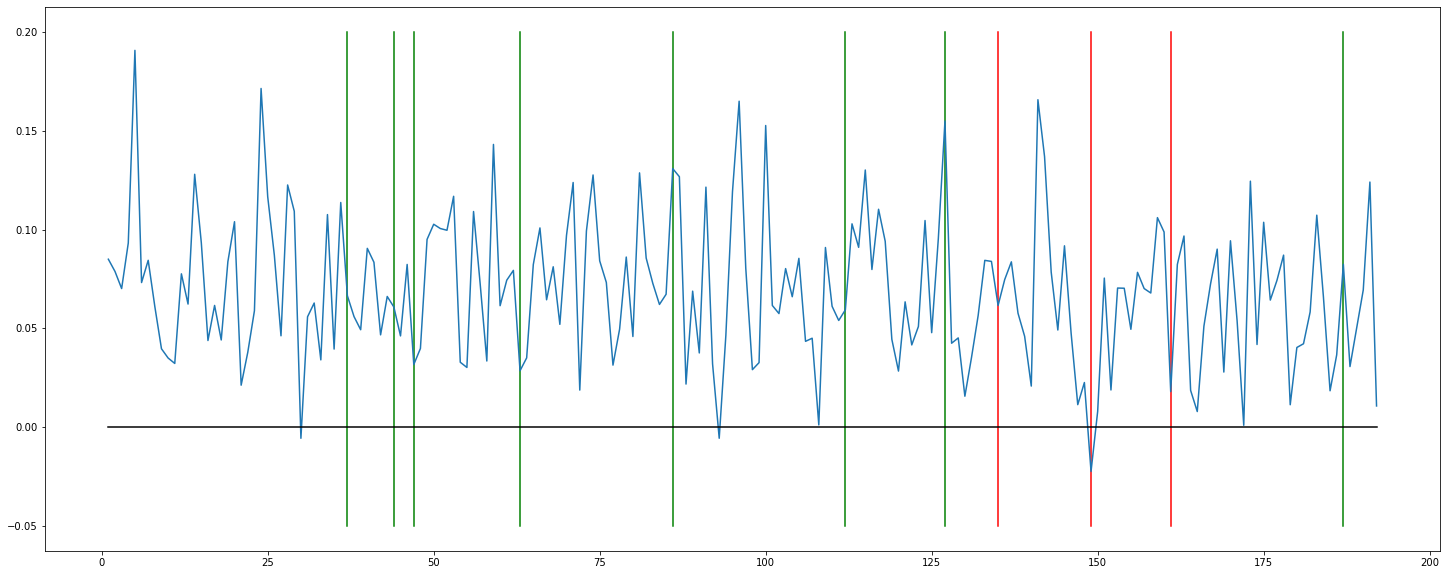

In [16]:
plt.figure(figsize=(25, 10)) 
[plt.plot([events['Index'][ind], events['Index'][ind]], [-0.05, 0.2], 'r', label=events["Event"][ind]) if events["Expected Effect"][ind] == 'Negative' else plt.plot([events['Index'][ind], events['Index'][ind]], [-0.05, 0.2], 'g', label=events["Event"][ind])  for ind in events.index]  
plt.plot(x_axis,y_axis)
plt.plot(x_axis,np.zeros(max(x_axis)), 'k', label='Neutral')
#plt.legend(('Mean daily Polarity against time','Neutral line'))
plt.show()

## Plotting Graphs

15/05/2021


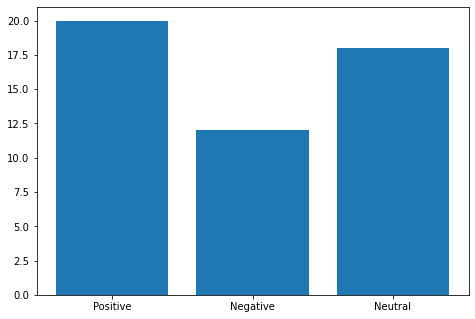

14/05/2021


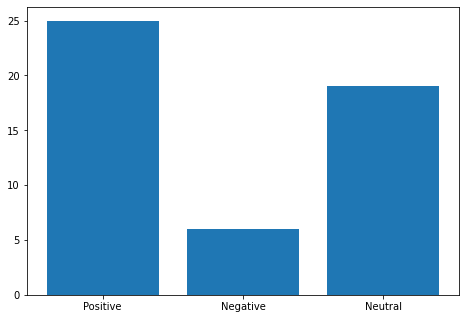

13/05/2021


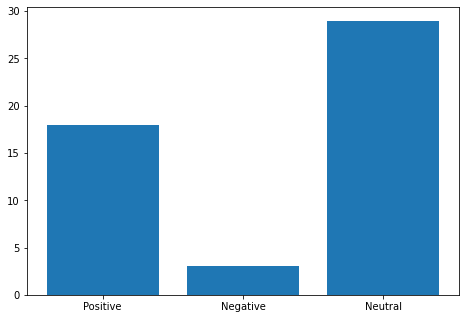

12/05/2021


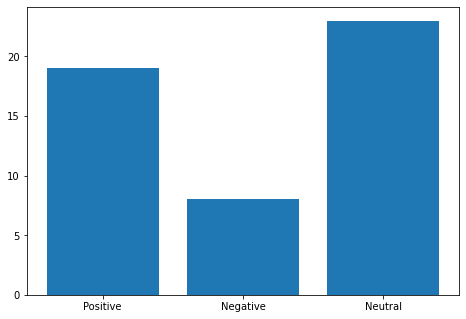

11/05/2021


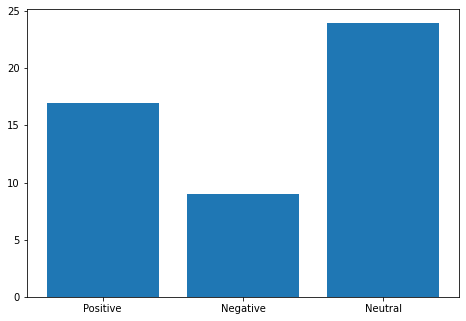

10/05/2021


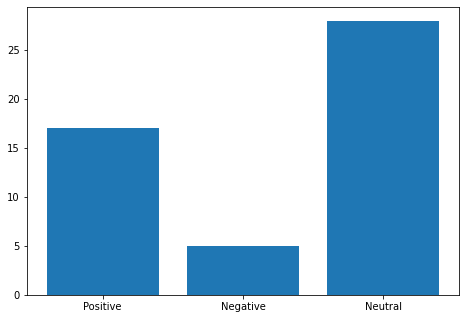

09/05/2021


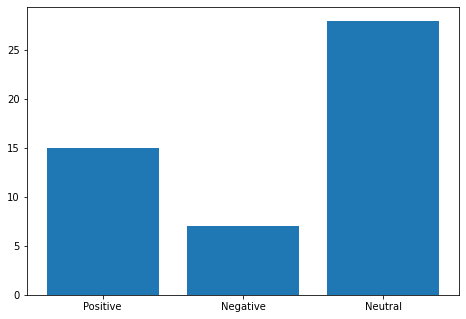

08/05/2021


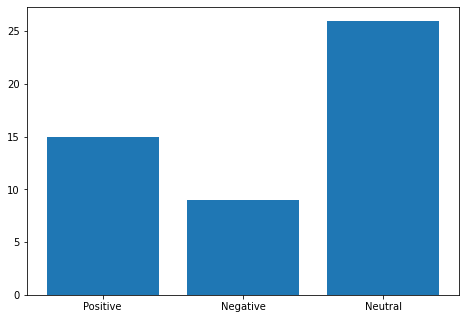

07/05/2021


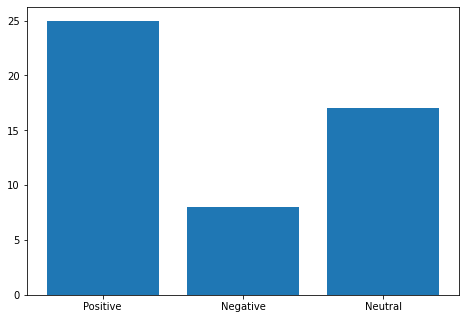

06/05/2021


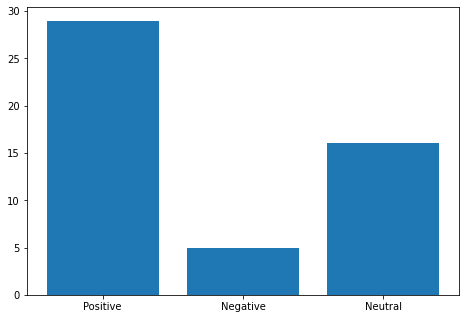

05/05/2021


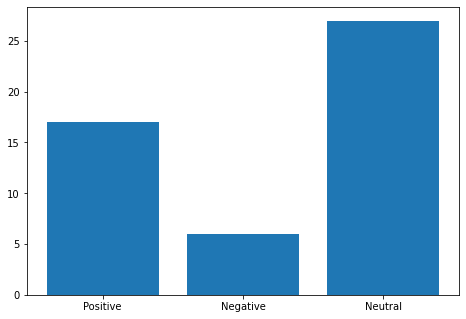

04/05/2021


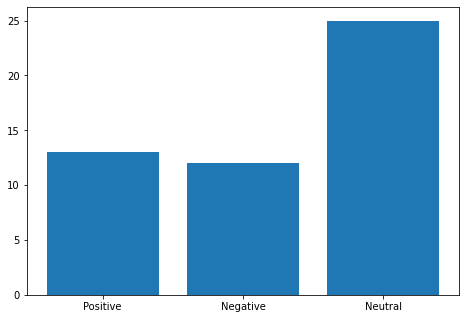

03/05/2021


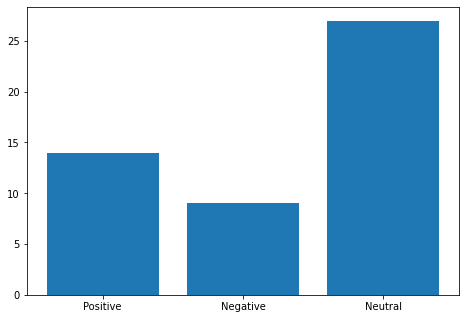

02/05/2021


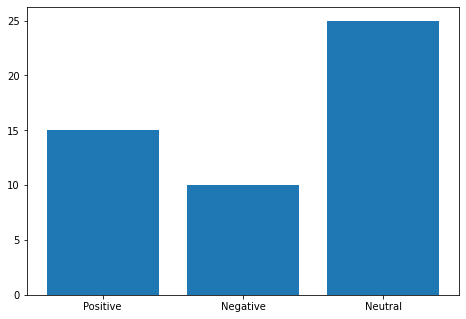

01/05/2021


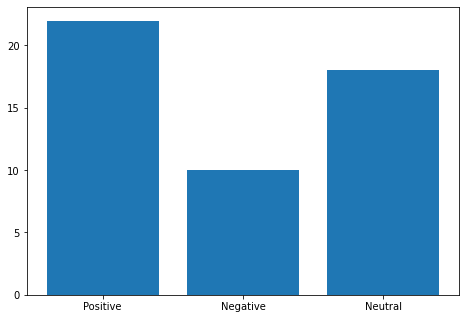

30/04/2021


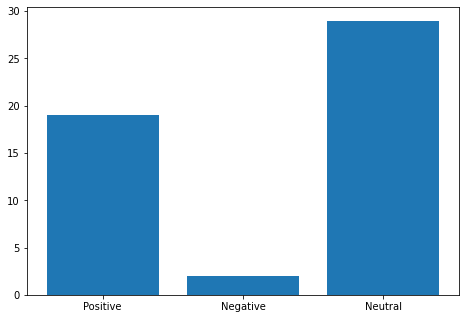

29/04/2021


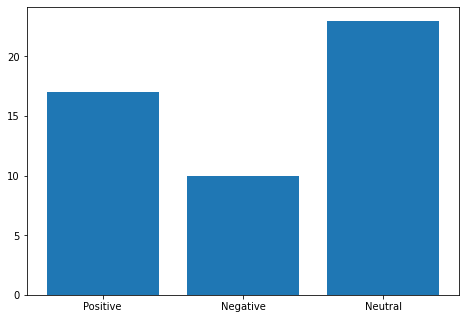

28/04/2021


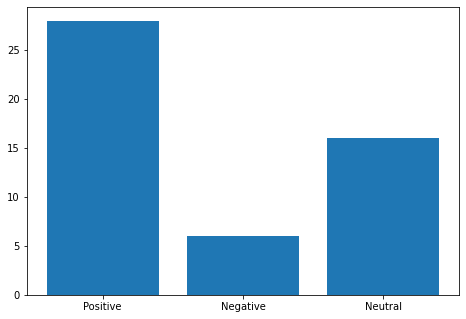

27/04/2021


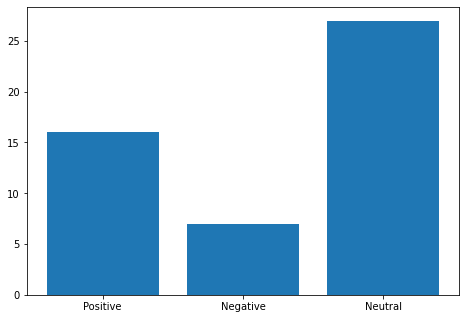

26/04/2021


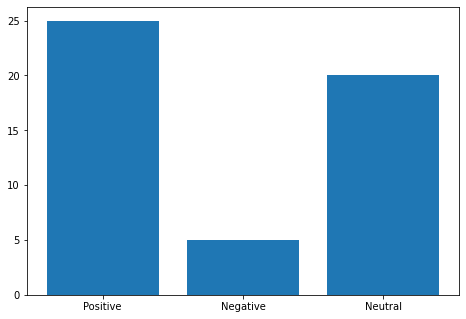

25/04/2021


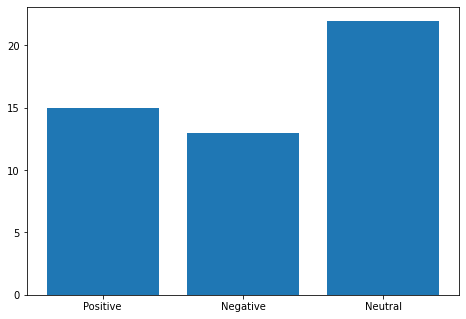

24/04/2021


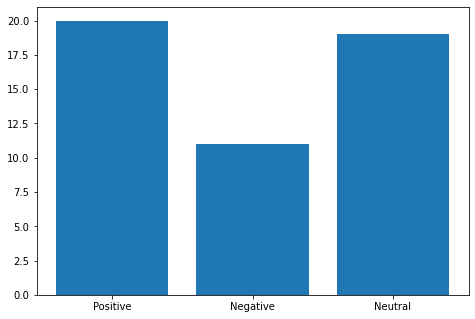

23/04/2021


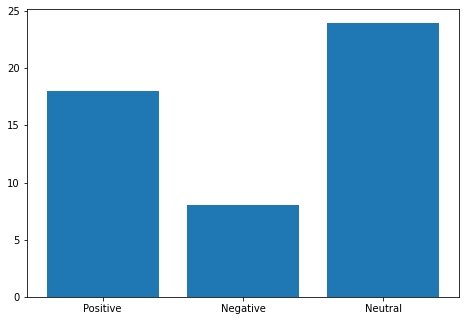

22/04/2021


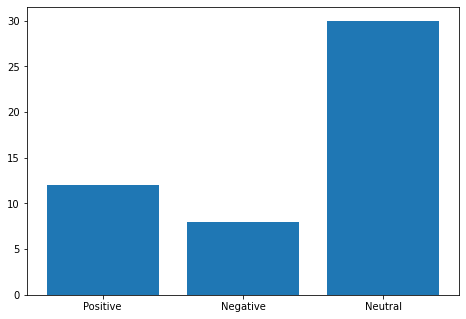

21/04/2021


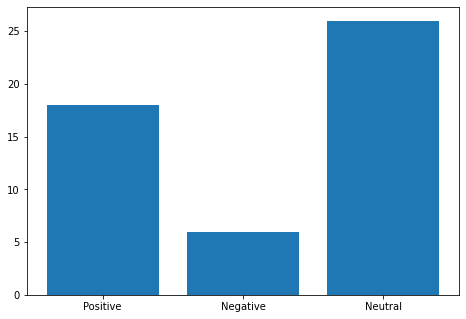

20/04/2021


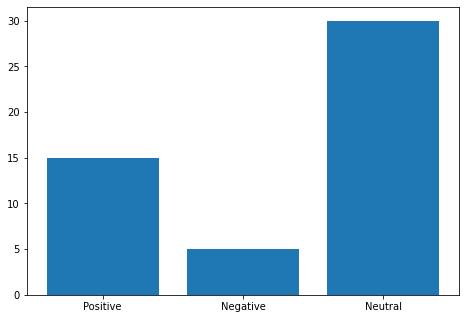

19/04/2021


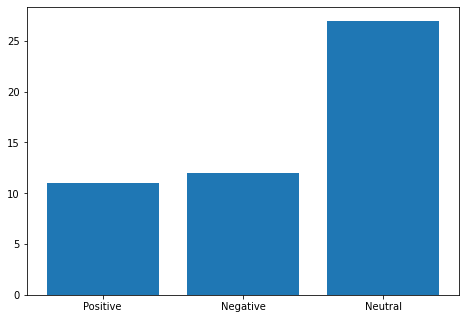

18/04/2021


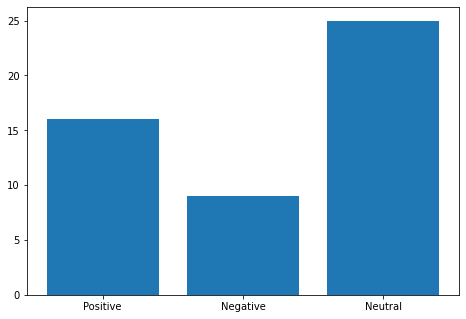

17/04/2021


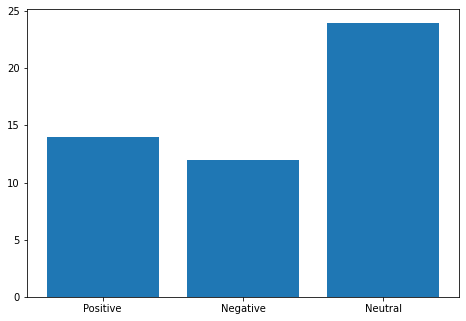

16/04/2021


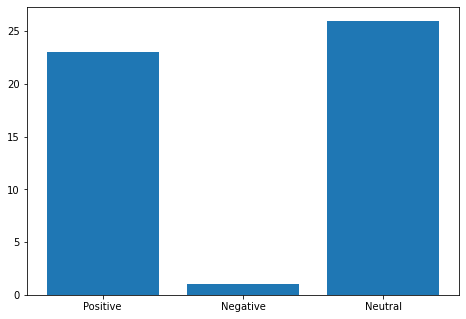

15/04/2021


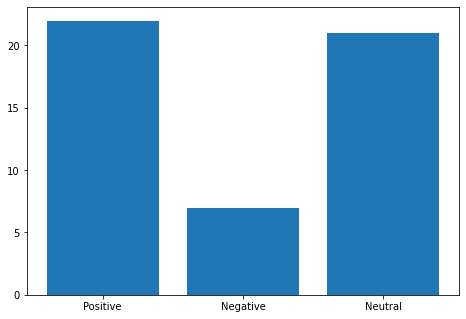

14/04/2021


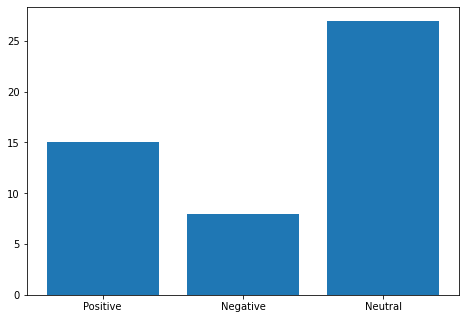

13/04/2021


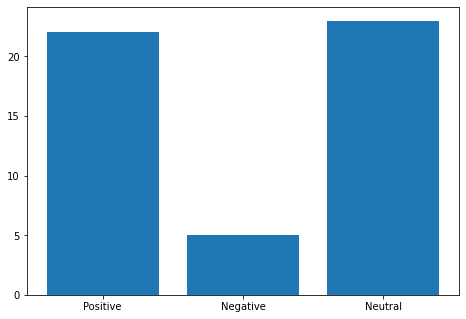

12/04/2021


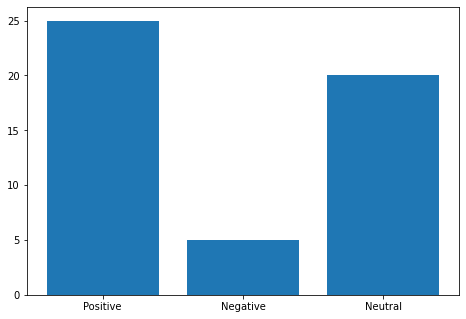

11/04/2021


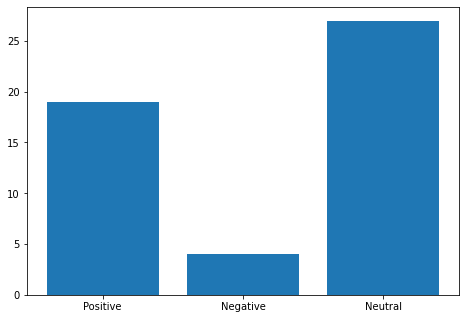

10/04/2021


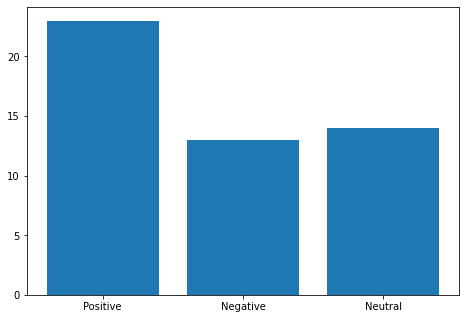

09/04/2021


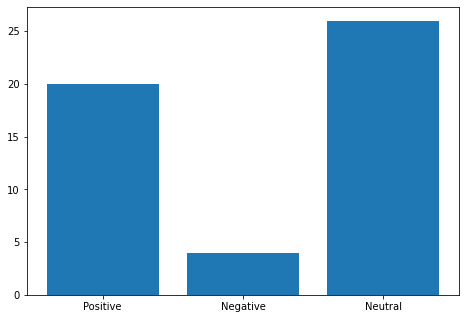

08/04/2021


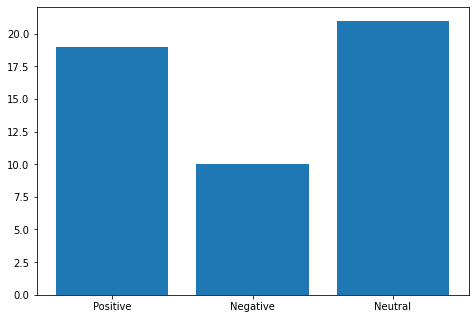

07/04/2021


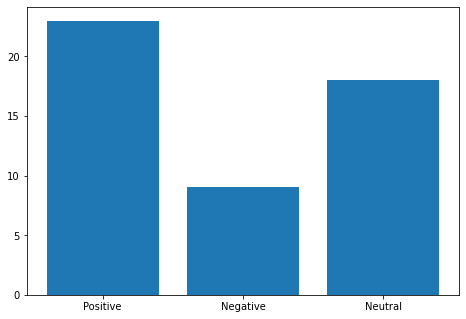

06/04/2021


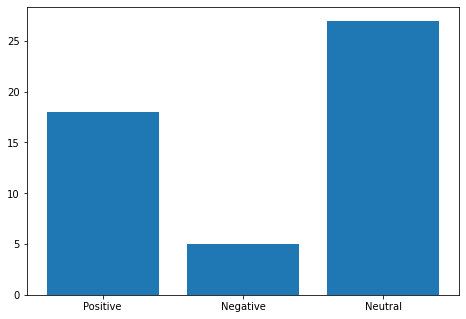

05/04/2021


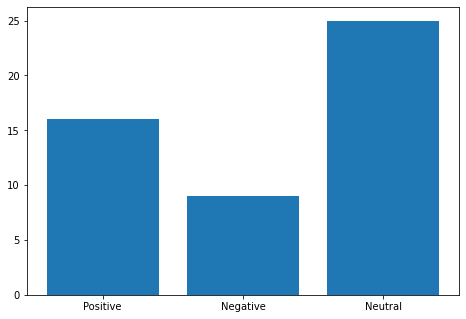

04/04/2021


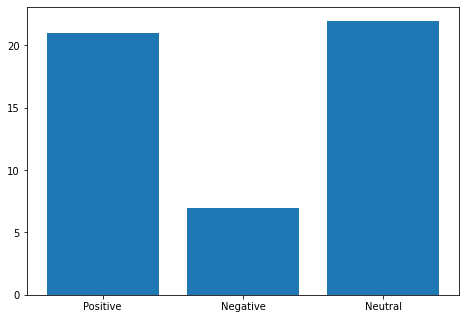

03/04/2021


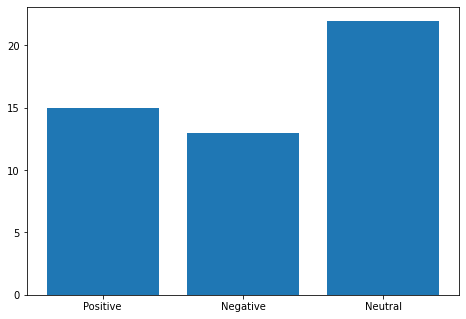

02/04/2021


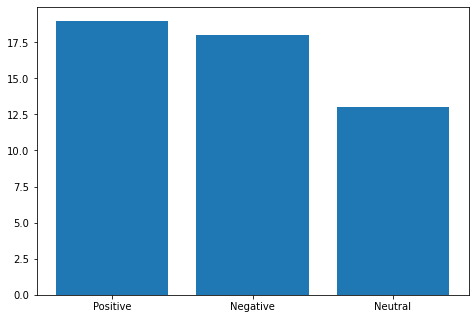

01/04/2021


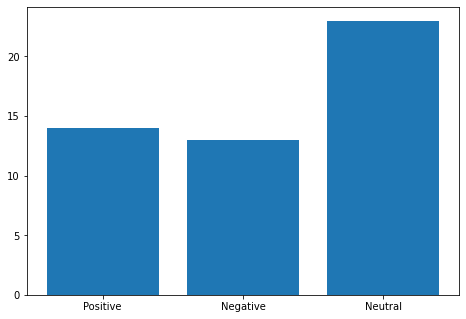

31/03/2021


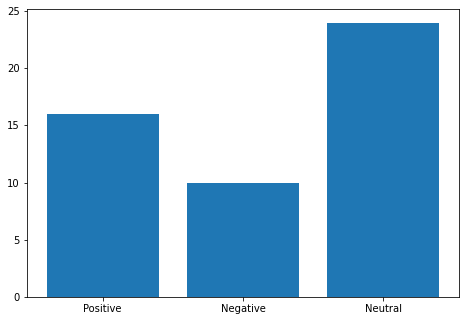

30/03/2021


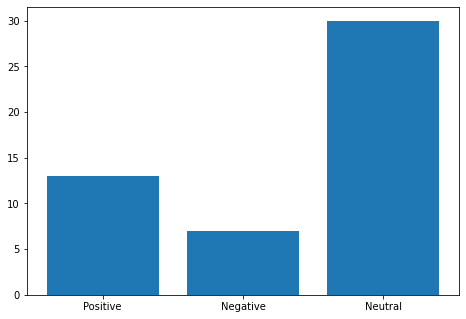

29/03/2021


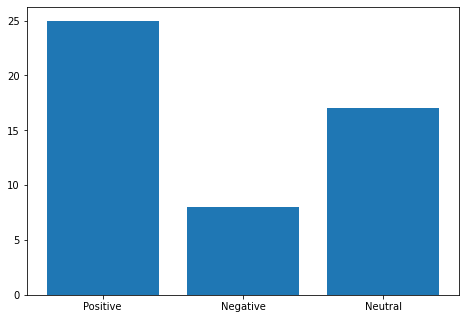

28/03/2021


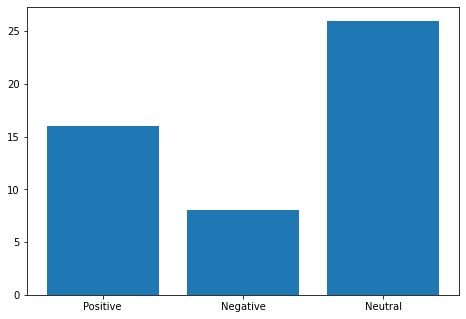

27/03/2021


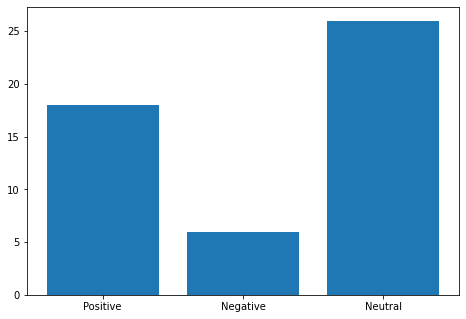

26/03/2021


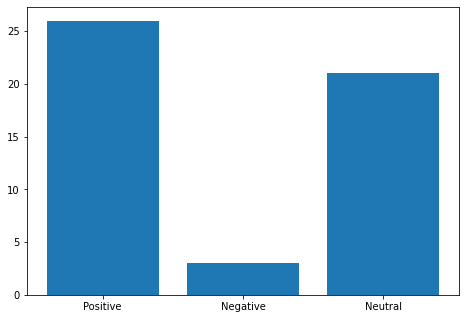

25/03/2021


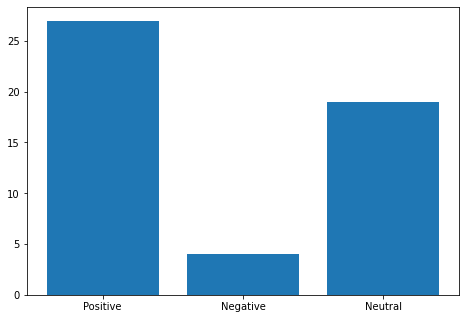

24/03/2021


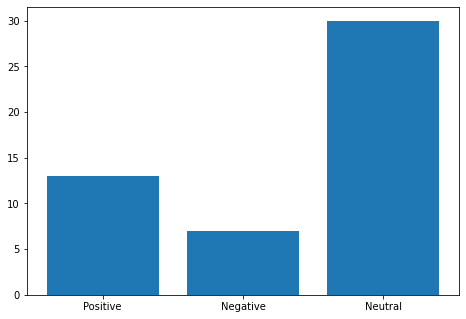

23/03/2021


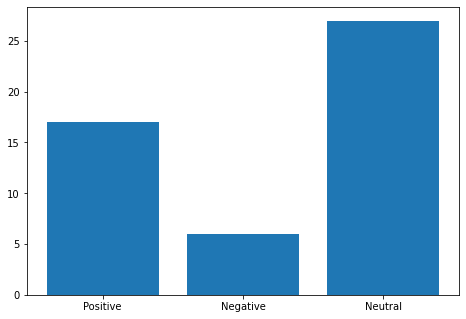

22/03/2021


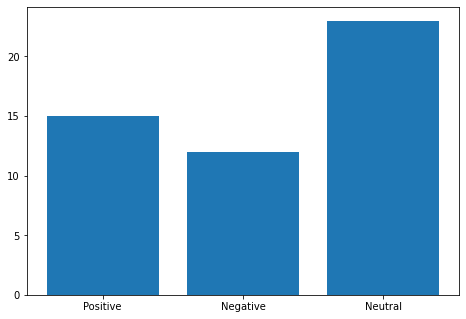

21/03/2021


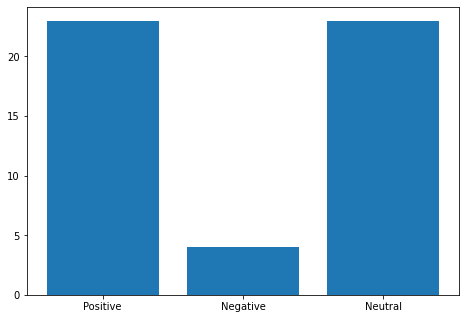

20/03/2021


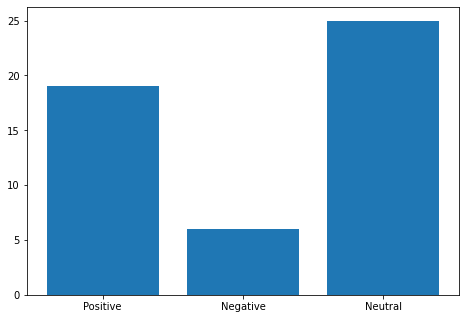

19/03/2021


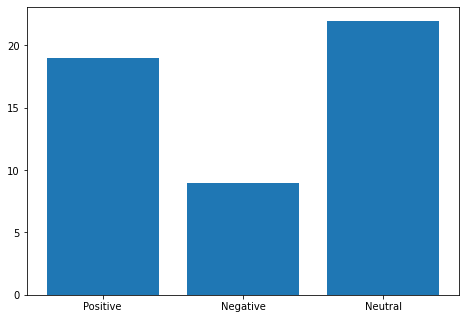

18/03/2021


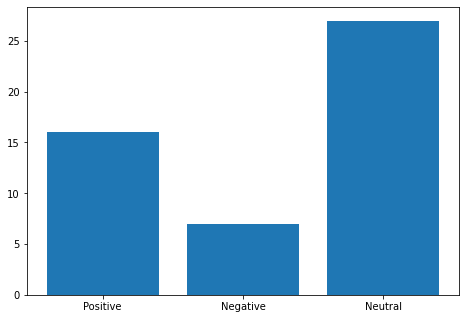

17/03/2021


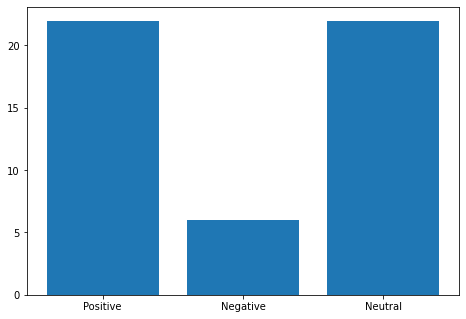

16/03/2021


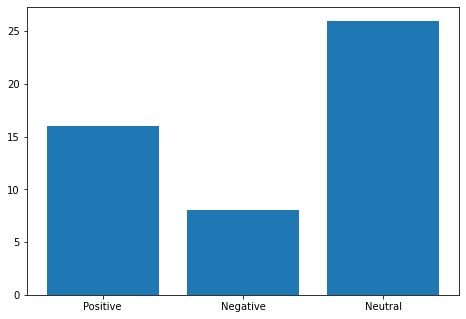

15/03/2021


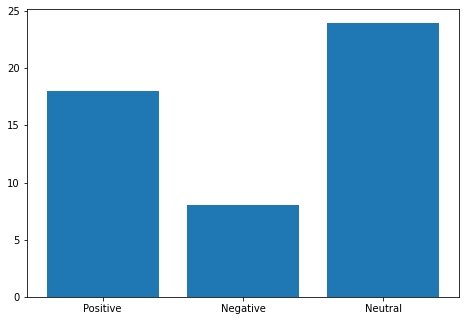

14/03/2021


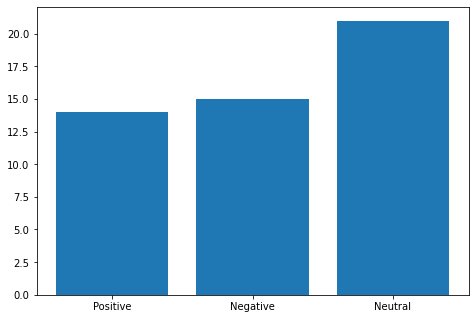

13/03/2021


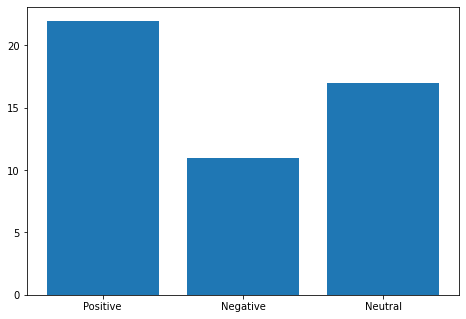

12/03/2021


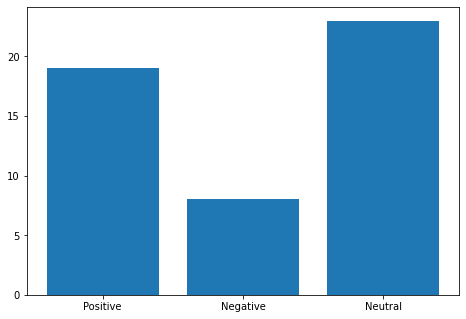

11/03/2021


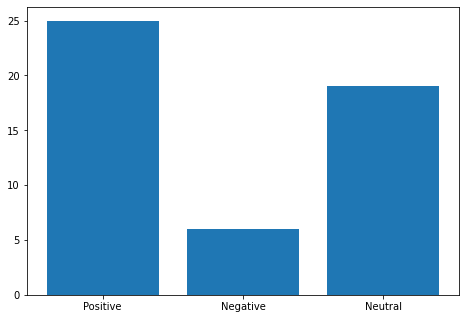

10/03/2021


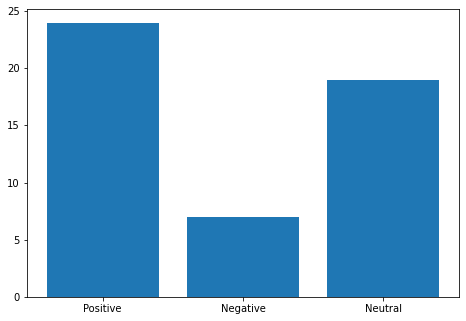

09/03/2021


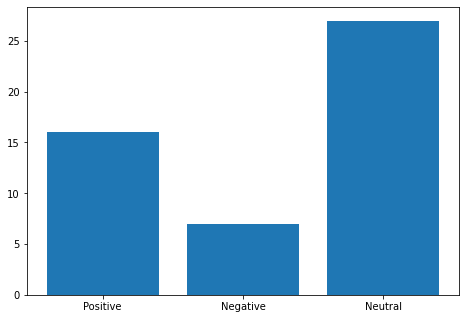

08/03/2021


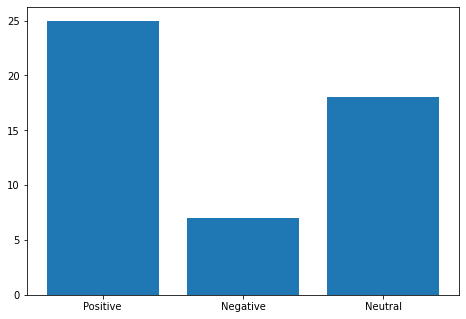

07/03/2021


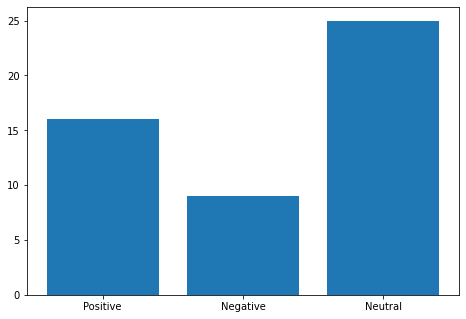

06/03/2021


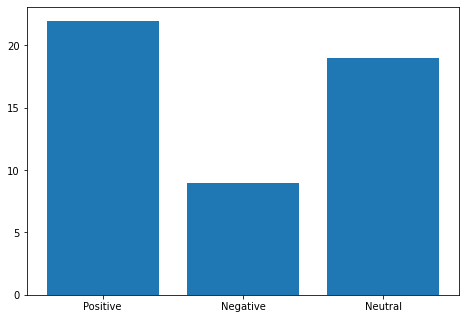

05/03/2021


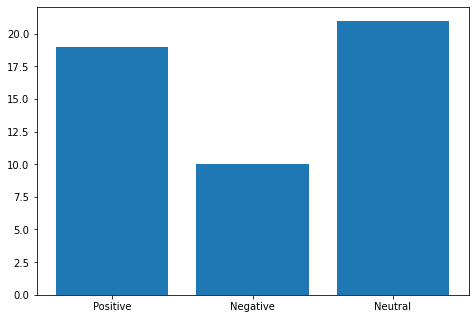

04/03/2021


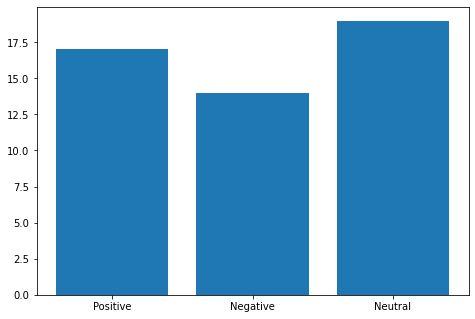

24/02/2021


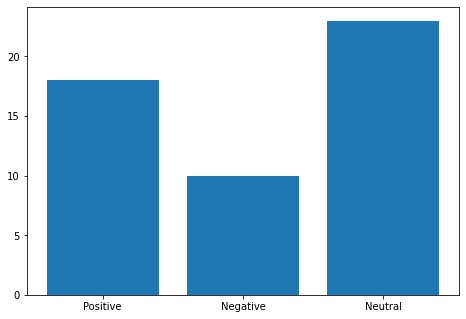

25/02/2021


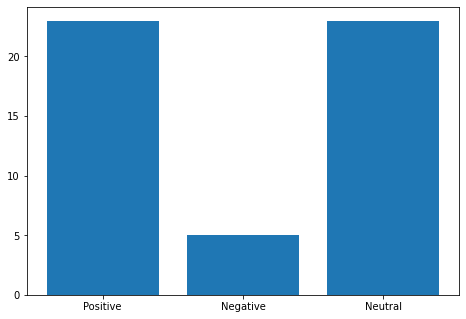

26/02/2021


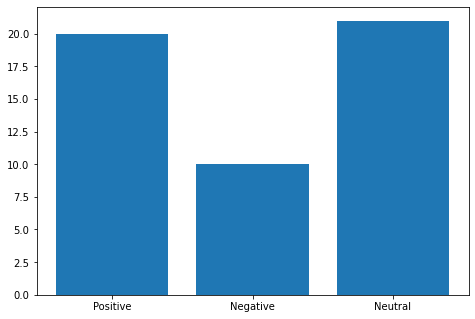

28/02/2021


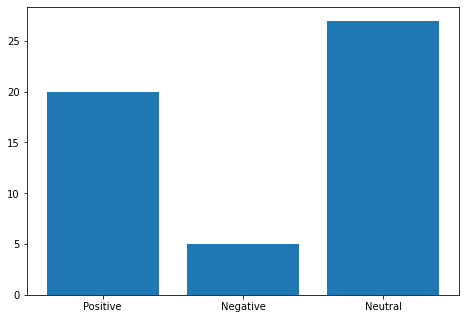

01/03/2021


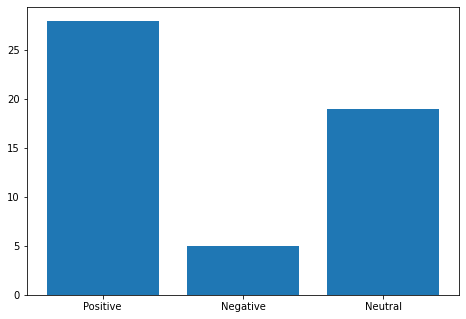

02/03/2021


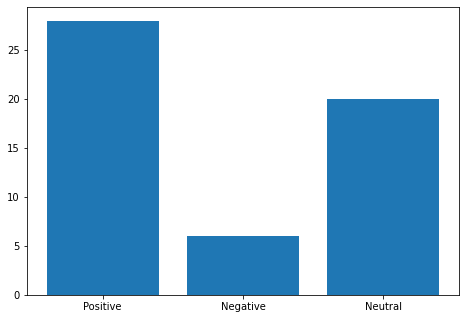

03/03/2021


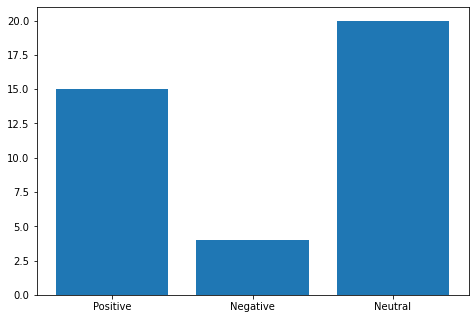

27/02/2021


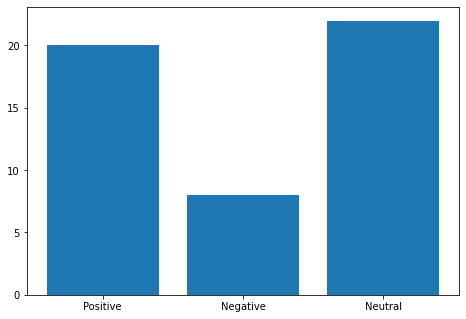

23/02/2021


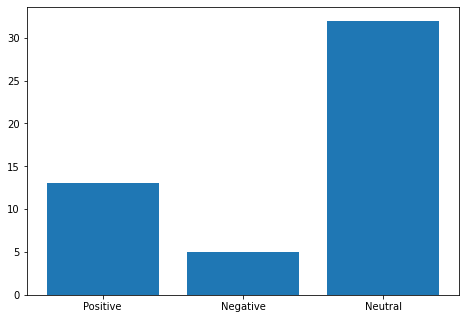

22/02/2021


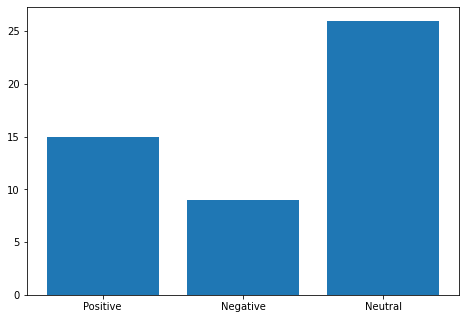

21/02/2021


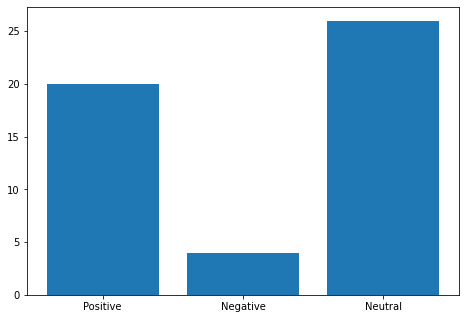

20/02/2021


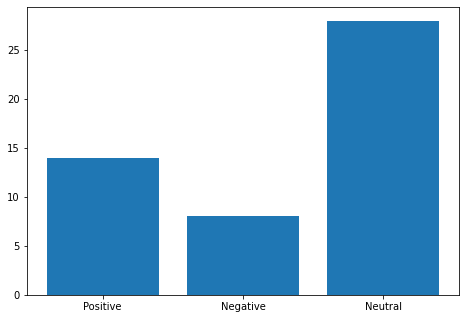

19/02/2021


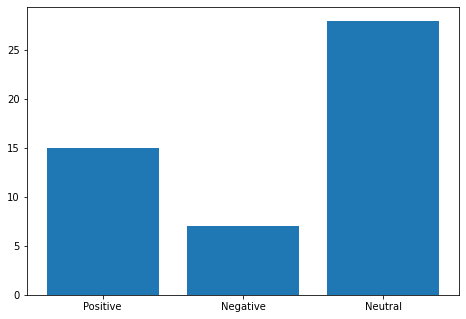

18/02/2021


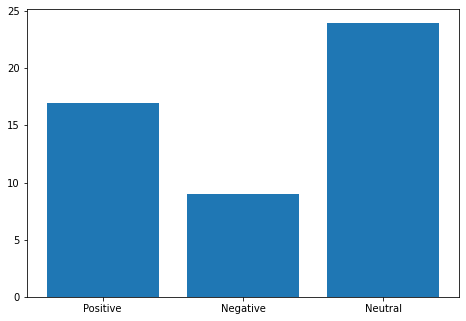

17/02/2021


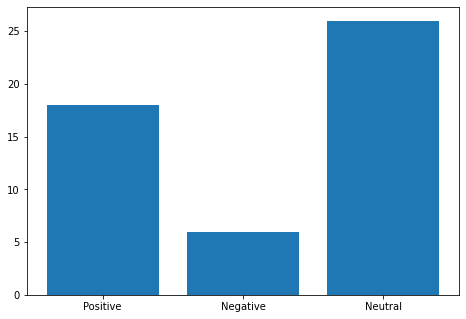

16/02/2021


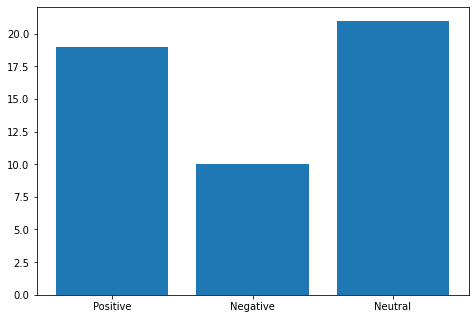

15/02/2021


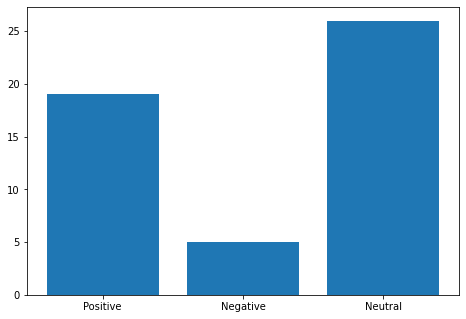

14/02/2021


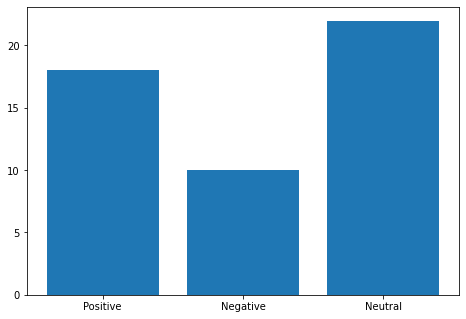

13/02/2021


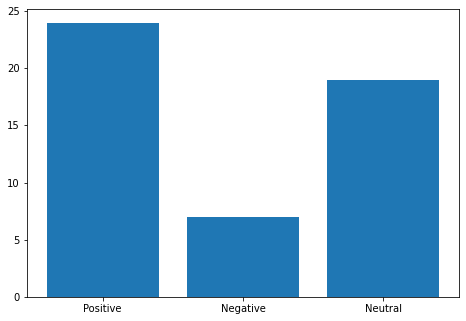

12/02/2021


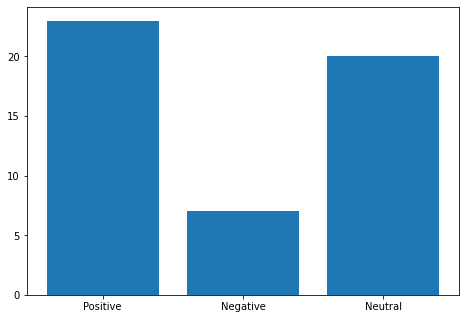

11/02/2021


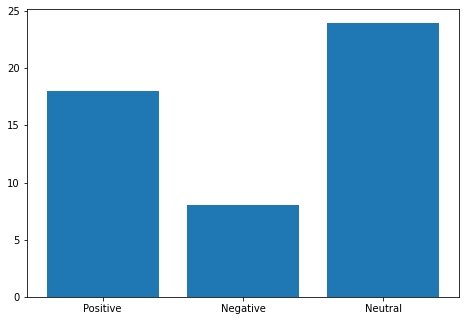

10/02/2021


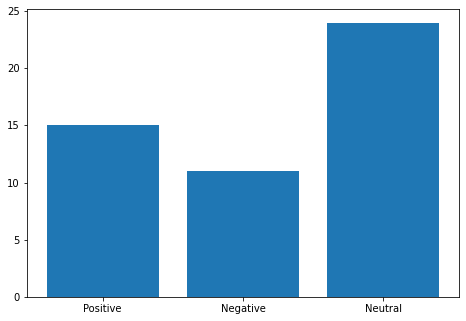

09/02/2021


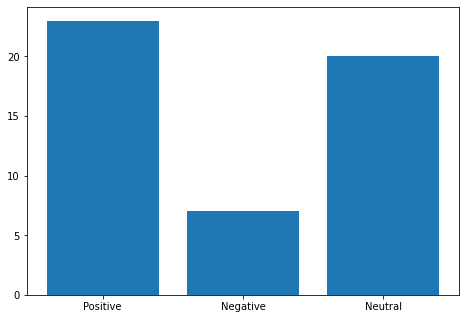

08/02/2021


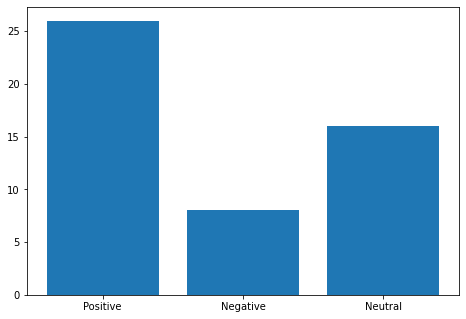

07/02/2021


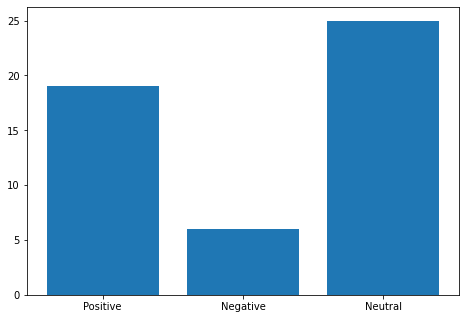

06/02/2021


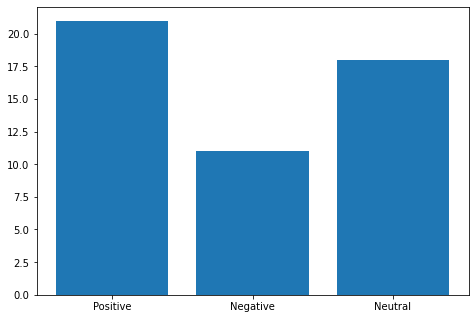

05/02/2021


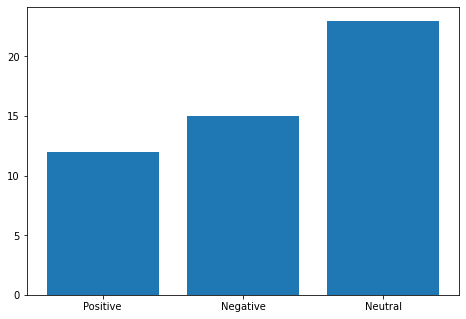

04/02/2021


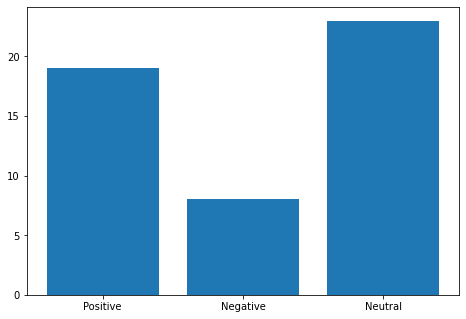

03/02/2021


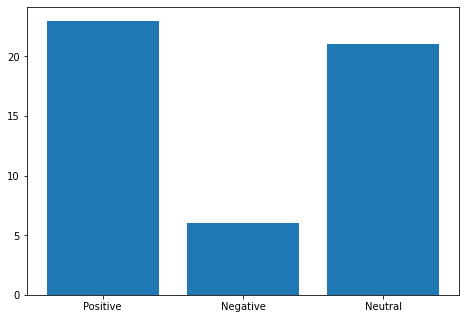

02/02/2021


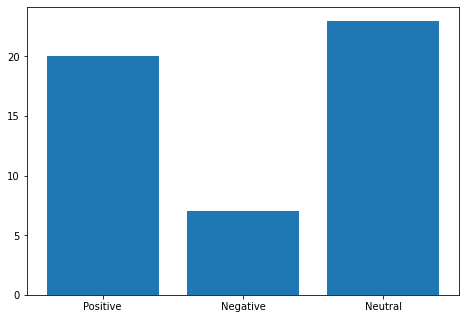

01/02/2021


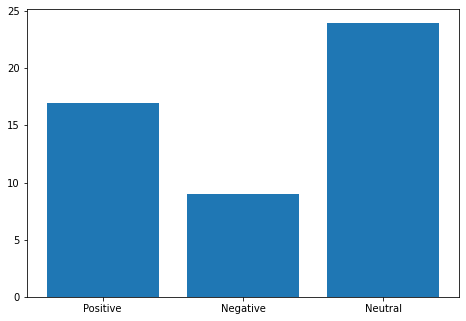

31/01/2021


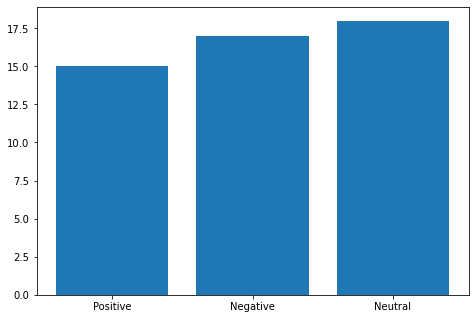

30/01/2021


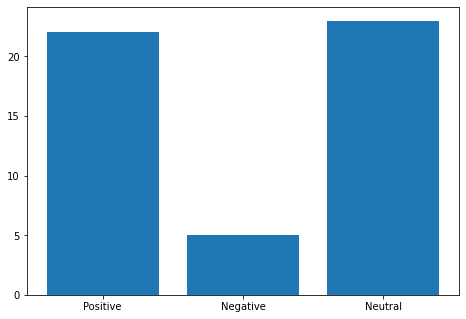

29/01/2021


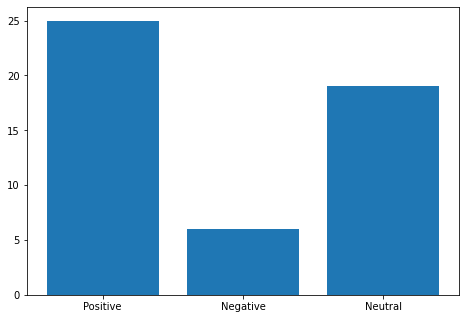

28/01/2021


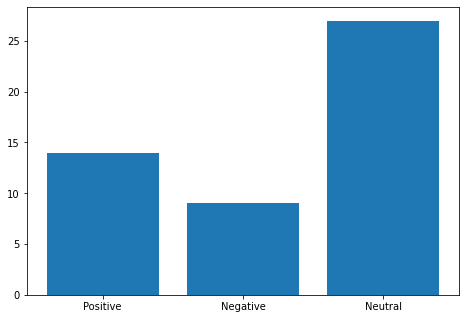

27/01/2021


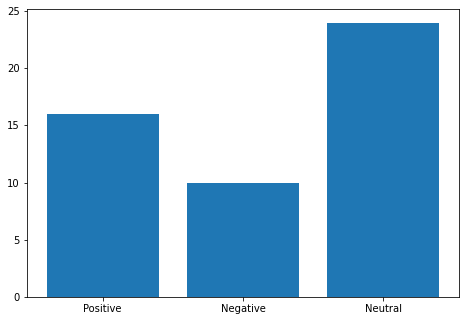

26/01/2021


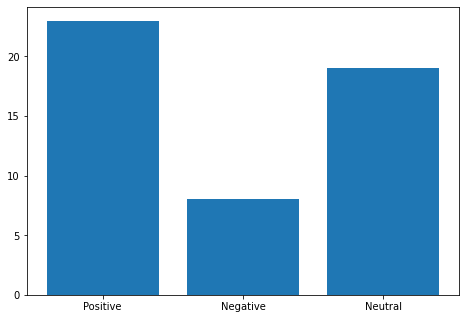

25/01/2021


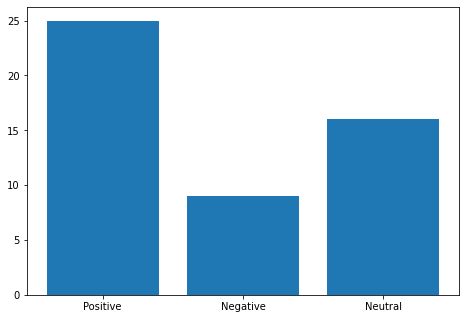

24/01/2021


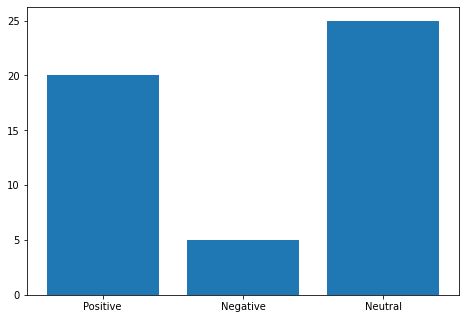

23/01/2021


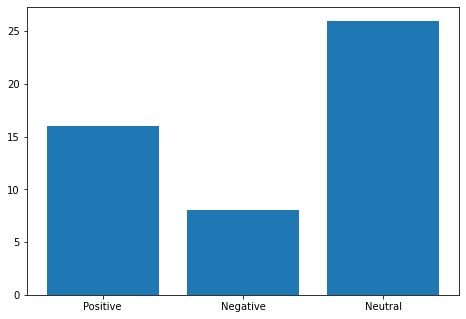

22/01/2021


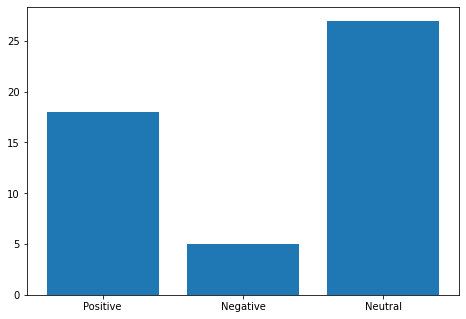

21/01/2021


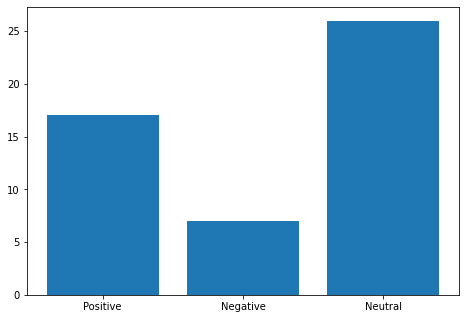

20/01/2021


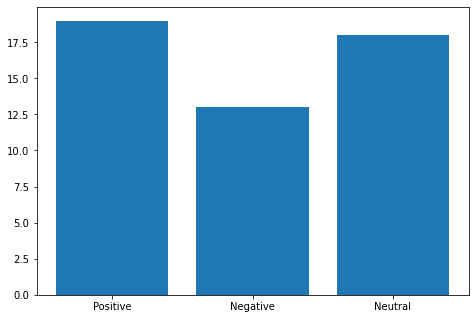

19/01/2021


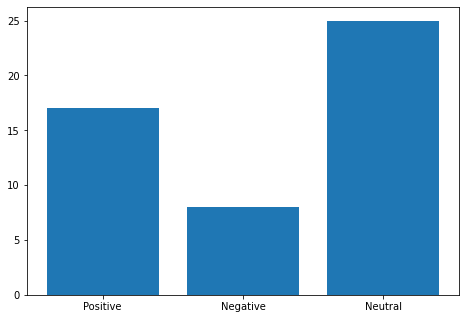

18/01/2021


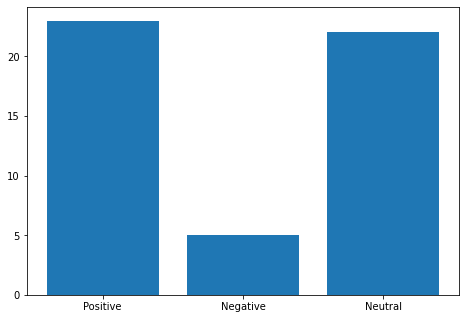

17/01/2021


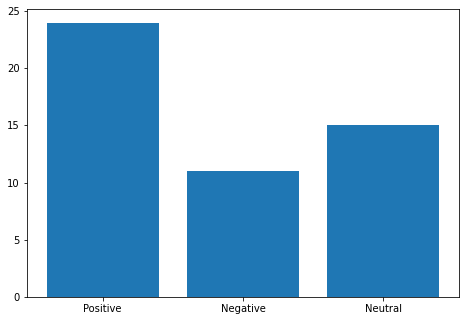

16/01/2021


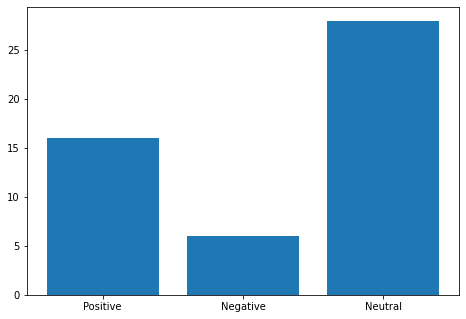

15/01/2021


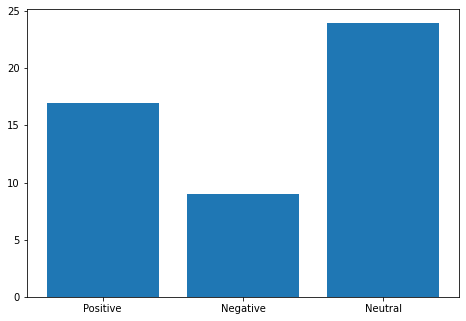

14/01/2021


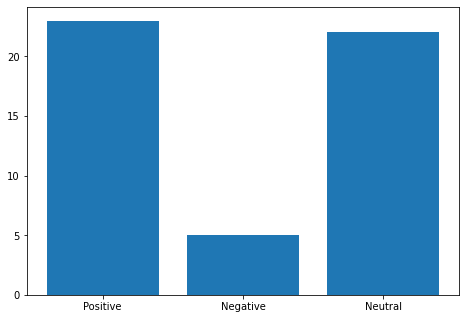

13/01/2021


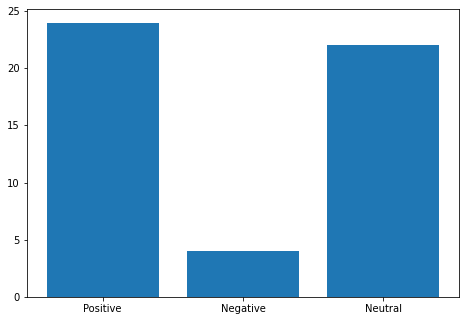

12/01/2021


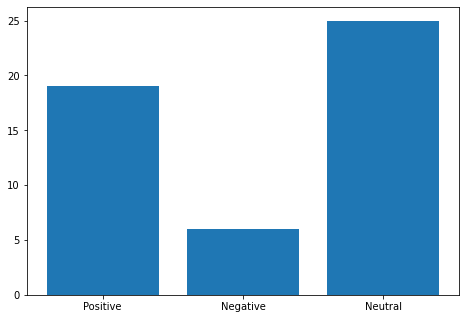

11/01/2021


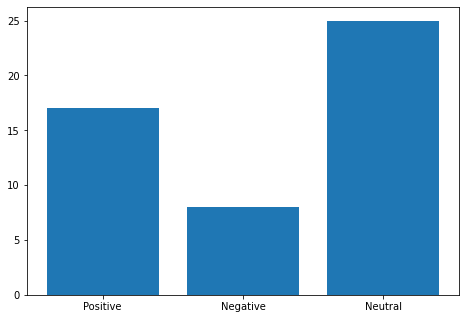

10/01/2021


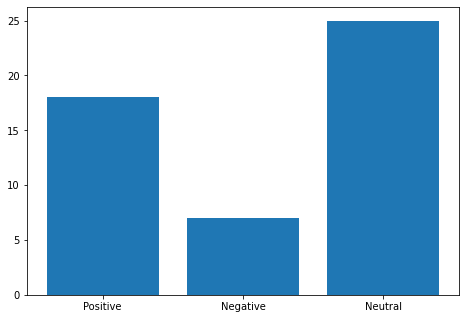

09/01/2021


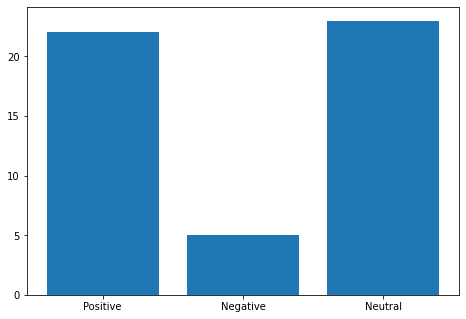

08/01/2021


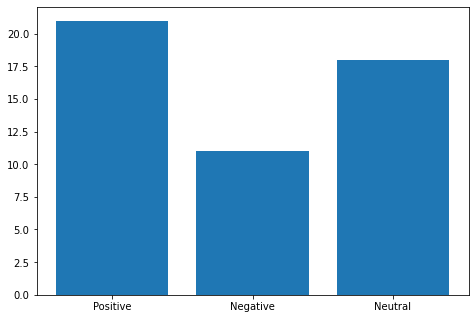

07/01/2021


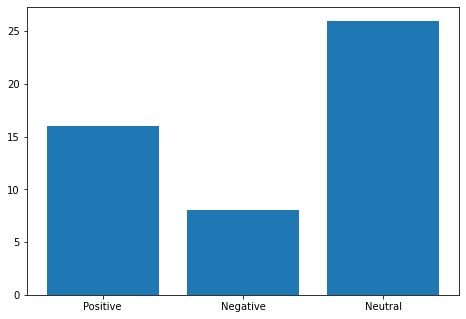

06/01/2021


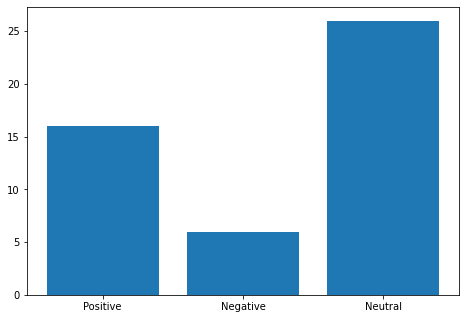

05/01/2021


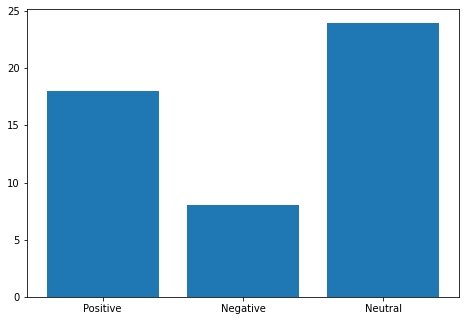

04/01/2021


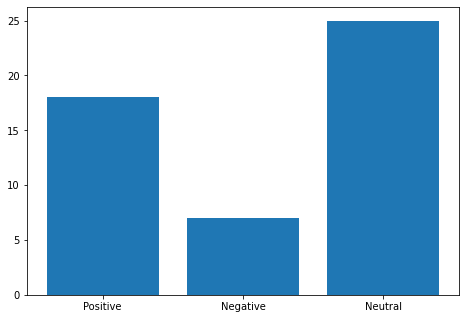

03/01/2021


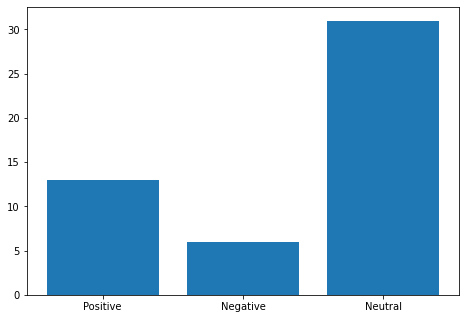

02/01/2021


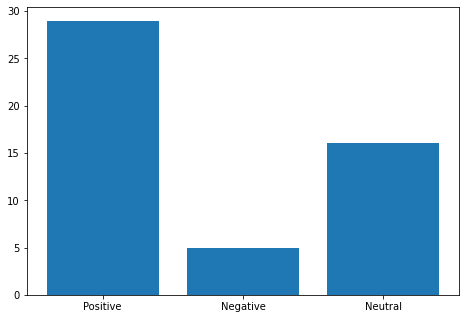

01/01/2021


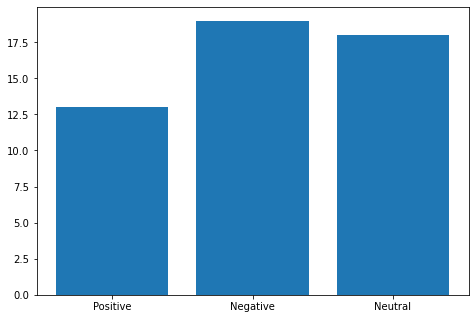

31/12/2020


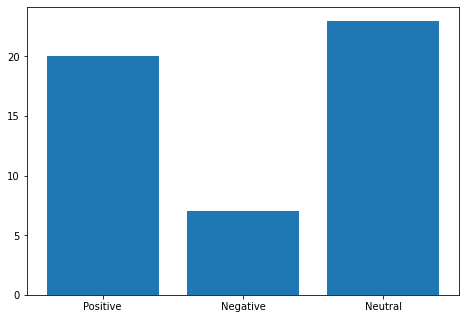

30/12/2020


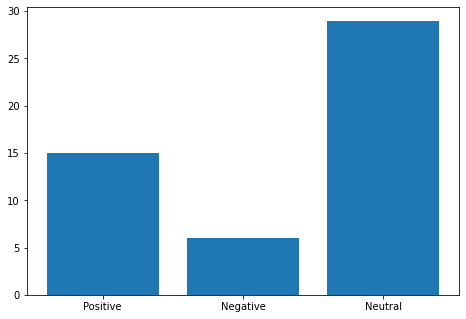

29/12/2020


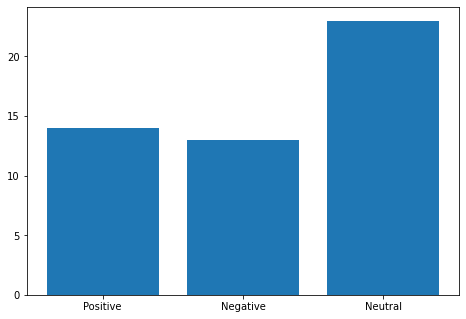

28/12/2020


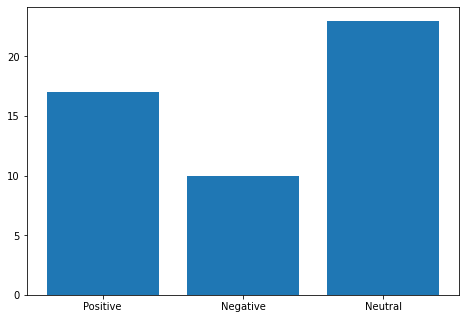

27/12/2020


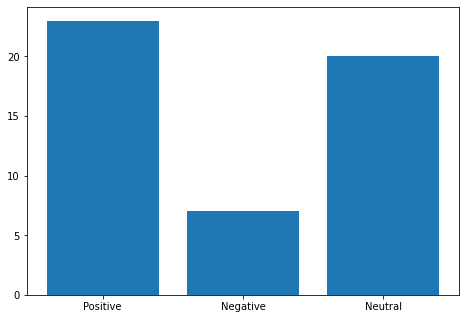

26/12/2020


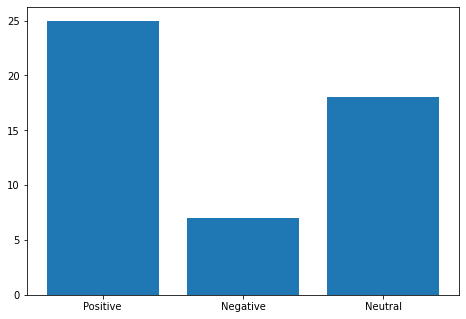

25/12/2020


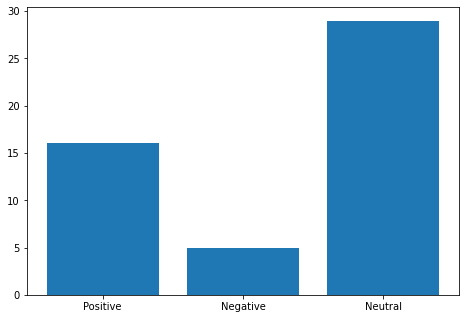

24/12/2020


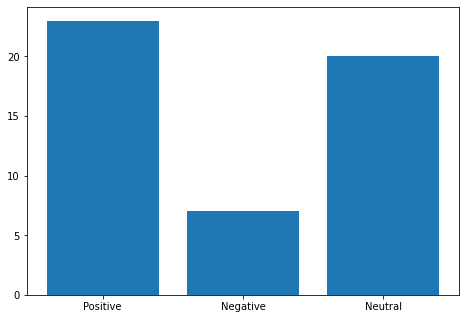

23/12/2020


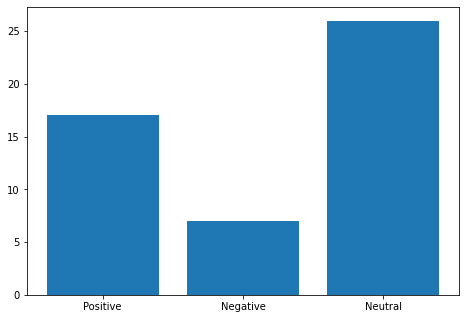

22/12/2020


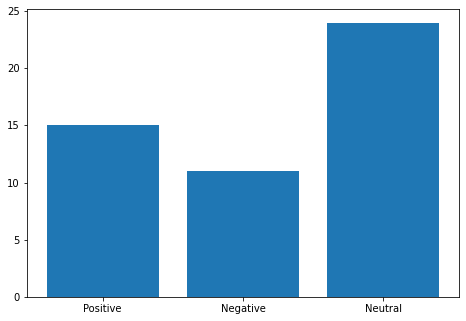

21/12/2020


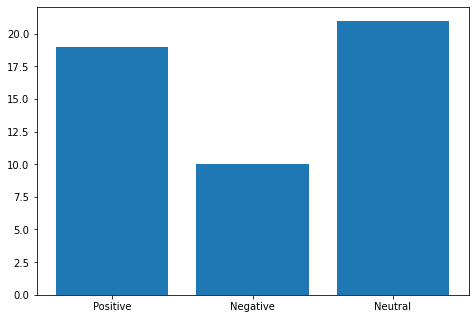

20/12/2020


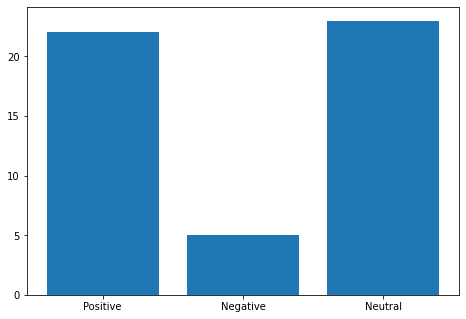

19/12/2020


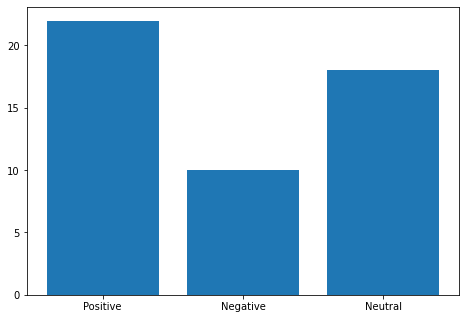

18/12/2020


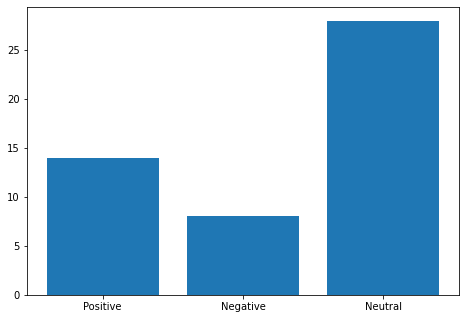

17/12/2020


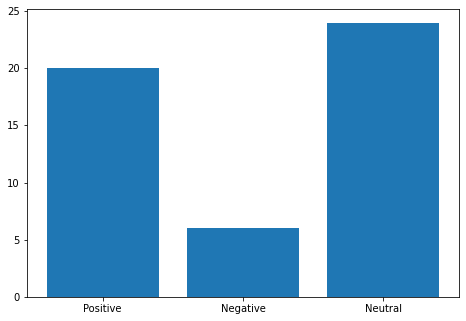

16/12/2020


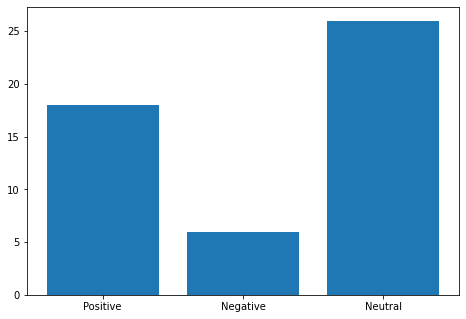

15/12/2020


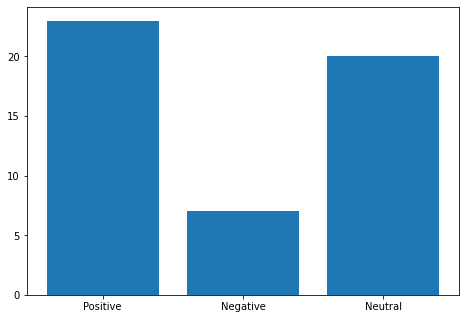

14/12/2020


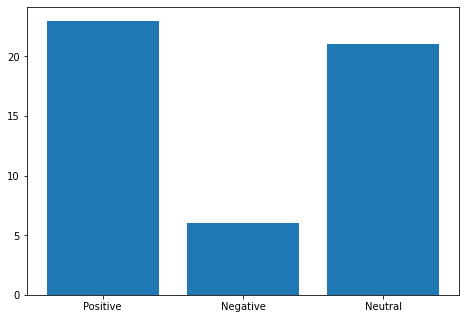

13/12/2020


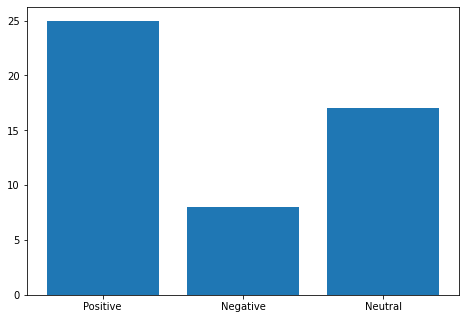

12/12/2020


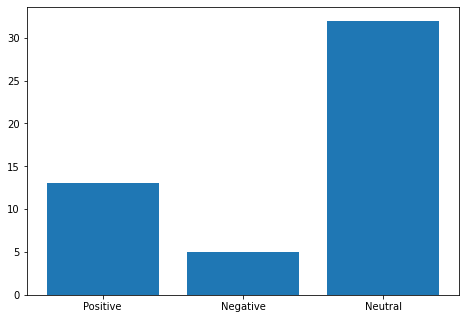

11/12/2020


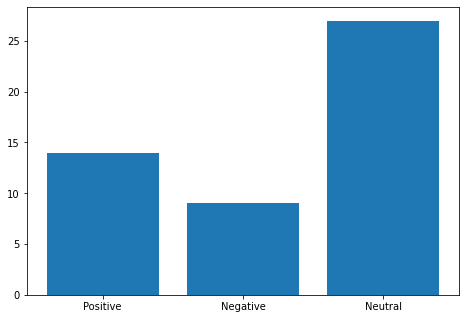

10/12/2020


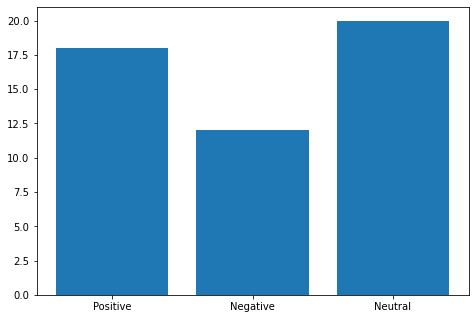

09/12/2020


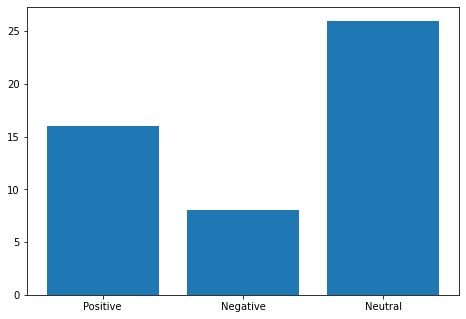

08/12/2020


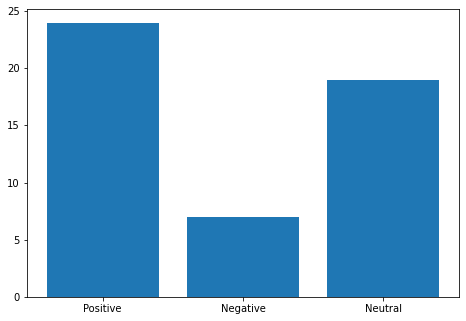

07/12/2020


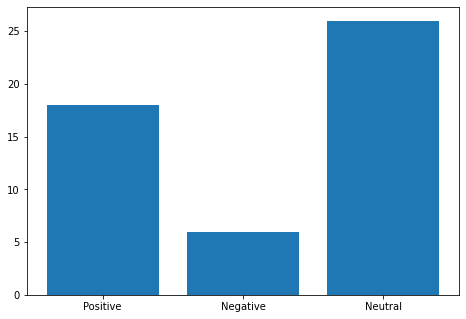

06/12/2020


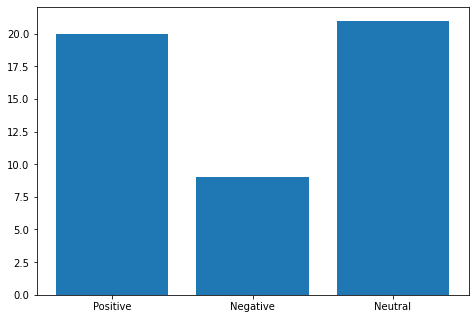

05/12/2020


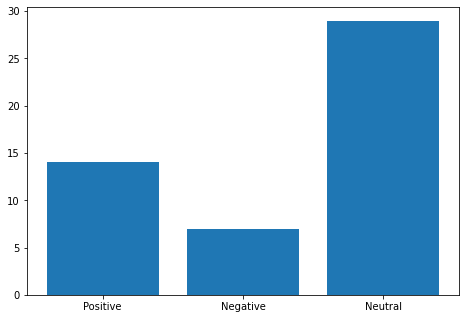

04/12/2020


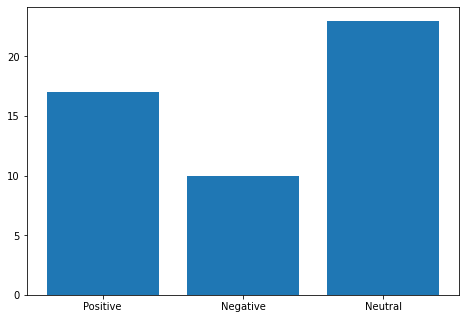

03/12/2020


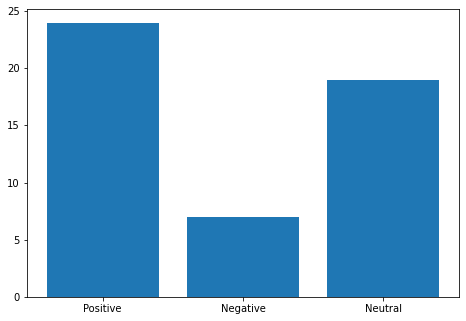

02/12/2020


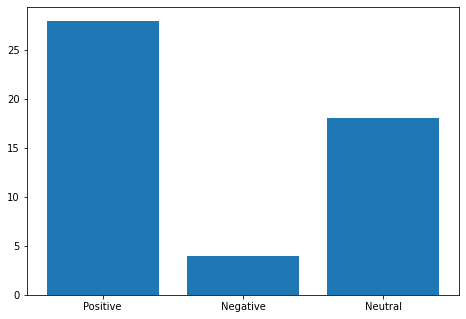

01/12/2020


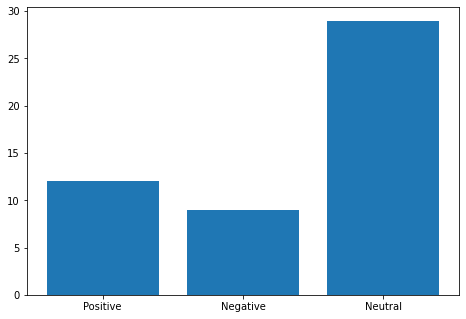

30/11/2020


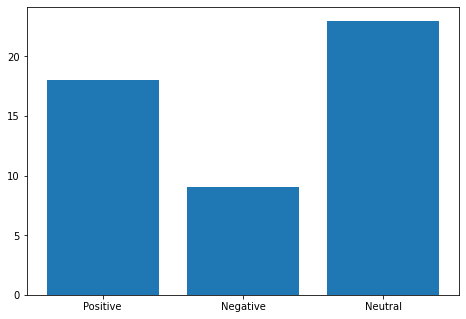

29/11/2020


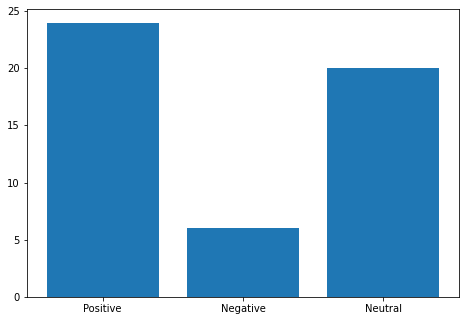

28/11/2020


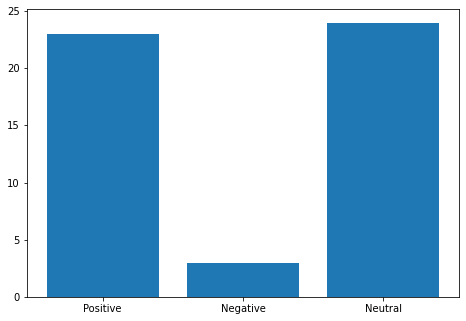

27/11/2020


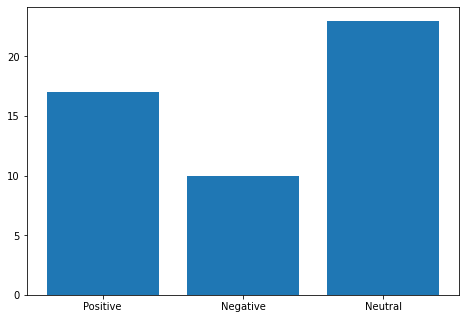

26/11/2020


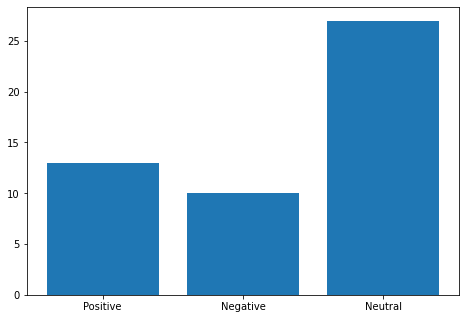

25/11/2020


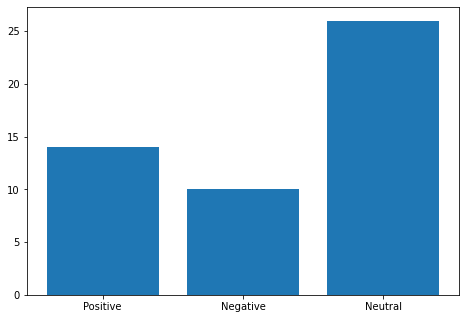

24/11/2020


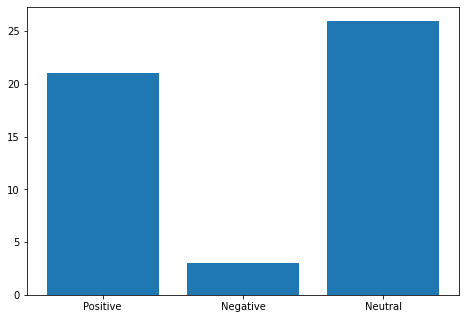

23/11/2020


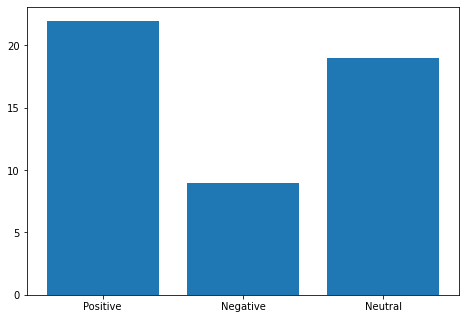

22/11/2020


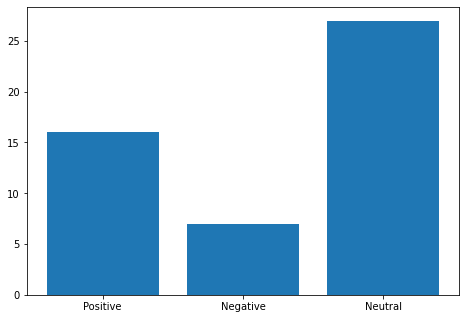

21/11/2020


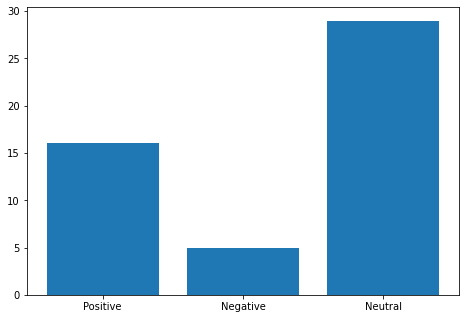

20/11/2020


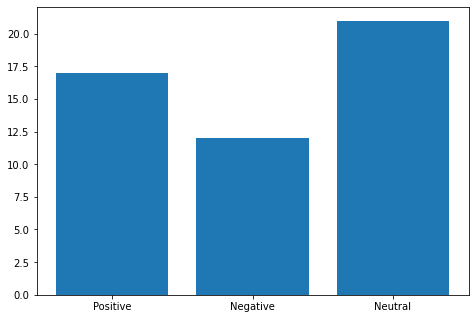

19/11/2020


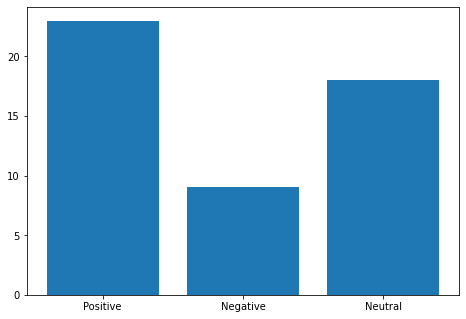

18/11/2020


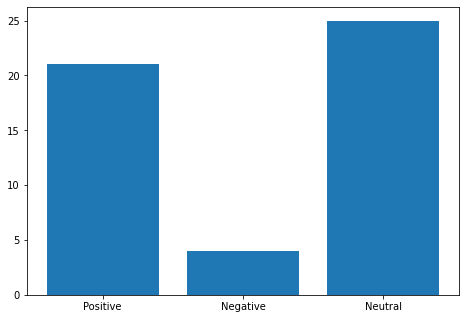

17/11/2020


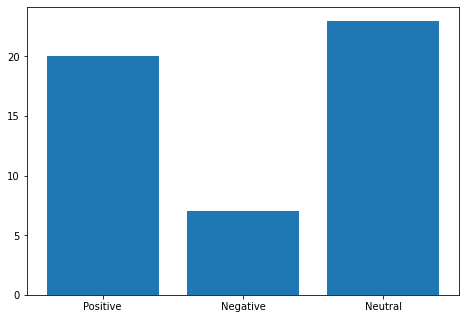

16/11/2020


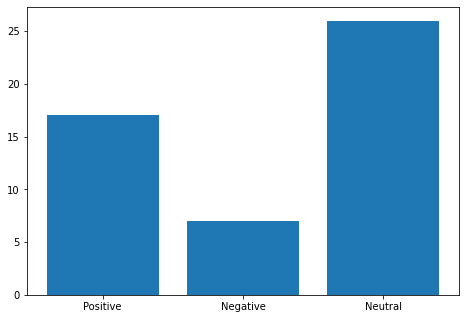

15/11/2020


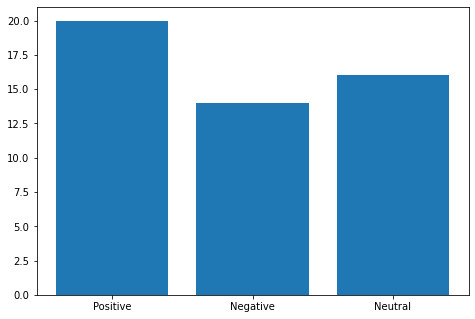

14/11/2020


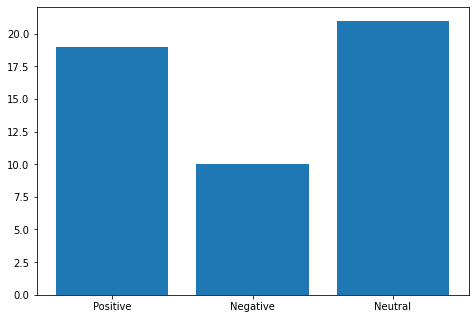

13/11/2020


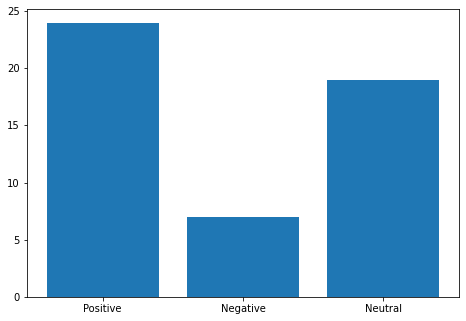

12/11/2020


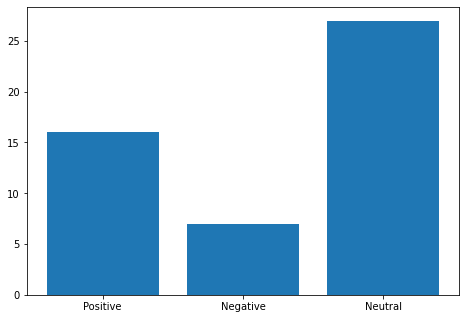

11/11/2020


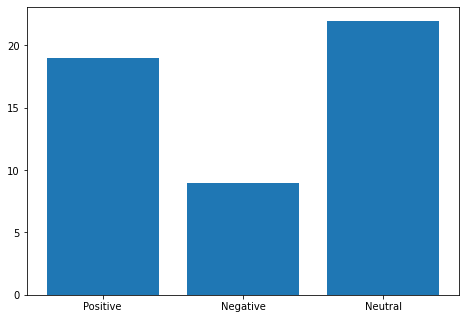

10/11/2020


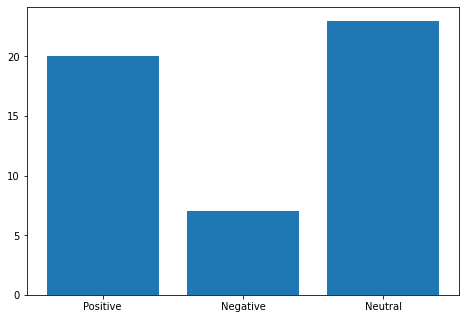

09/11/2020


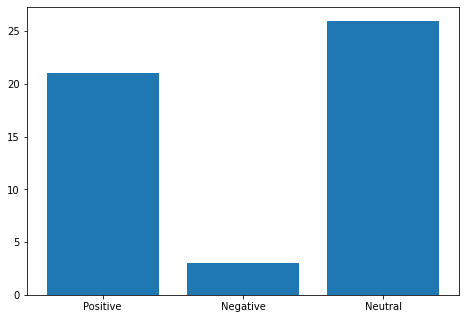

08/11/2020


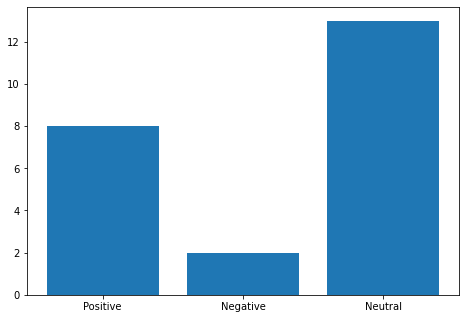

07/11/2020


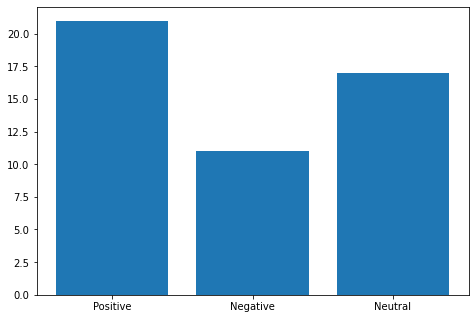

06/11/2020


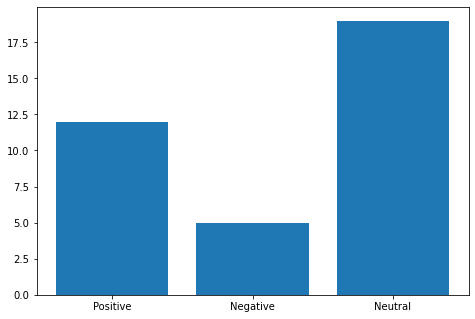

05/11/2020


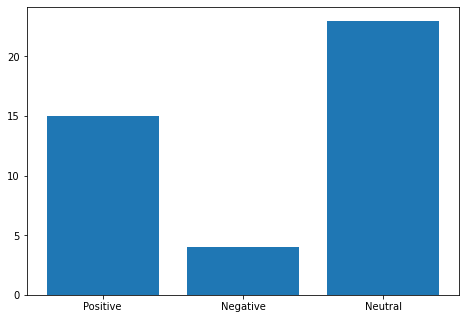

In [17]:
for date in df['Date'].unique():
    print(date)
    day_df = df.loc[df['Date'] == date]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    labels = ["Positive","Negative","Neutral"]
    values = [day_df['Polarity Threshold'].value_counts()['Positive'], day_df['Polarity Threshold'].value_counts()['Negative'], day_df['Polarity Threshold'].value_counts()['Neutral']]
    ax.bar(labels,values)
    plt.show()